Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 63

In [1]:
num_days_R_prediction=63

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

In [4]:
bypass_weather=1 # =1 bypass weather_pi api calls

### Load Data from Github - John Hopkins Institute 

In [5]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [6]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                               NaN                    Laos  19.856270   
239                               NaN                   Libya  26.335100   
240                               NaN      West Bank and Gaza  31.952200   
241                               NaN           Guinea-Bissau  11.803700   
242                               NaN                    Mali  17.570692   
243                               NaN   Saint Kitts and Nevis  17.357822   
244             Northwest Territories                  Canada  64.825500   
245                             Yukon                  Canada  64.282300   
246                               NaN                  Kosovo  42.602636   
247                               NaN                   Burma  21.916200   
248                          Anguilla          United Kingdom  18.220600   
249            British Virgin Islands          United Kingdom  18.420700   
250          Turks and Caicos Islands          United Kingdom  21.694000   
251                               NaN              MS Zaandam   0.000000   
252                               NaN                Botswana -22.328500   
253                               NaN                 Burundi  -3.373100   
254                               NaN            Sierra Leone   8.460555   
255  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
256                               NaN                  Malawi -13.25430

## Get Population

In [7]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
238                               NaN             Timor-Leste  -8.874217   
239                               NaN                  Belize  13.193900   
240                               NaN                    Laos  19.856270   
241                               NaN                   Libya  26.335100   
242                               NaN      West Bank and Gaza  31.952200   
243                               NaN           Guinea-Bissau  11.803700   
244                               NaN                    Mali  17.570692   
245                               NaN   Saint Kitts and Nevis  17.357822   
246             Northwest Territories                  Canada  64.825500   
247                             Yukon                  Canada  64.282300   
248                               NaN                  Kosovo  42.602636   
249                               NaN                   Burma  21.916200   
250                          Anguilla          United Kingdom  18.220600   
251            British Virgin Islands          United Kingdom  18.420700   
252          Turks and Caicos Islands          United Kingdom  21.694000   
253                               NaN              MS Zaandam   0.000000   
254                               NaN                Botswana -22.328500   
255                               NaN                 Burundi  -3.373100   
256                               NaN            Sierra Leone   8.460555   
257  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
258                               NaN                  Malawi -13.25430

In [9]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/2/20  \
185        0        0        0        0        0        0  ...    1092   
186        0        0        0        0        0        0  ...    1436   
187        0        0        0        0        0        0  ...      43   
188        0        0        0        0        0        0  ...    1288   
189        0        0        0        0        0        0  ...    5031   
190        0        0        0        0        0        0  ...       2   
191        0        0        0        0        0        0  ...       0   
192        0        0        0        0        0        0  ...       0   
193        0        0        0        0        0        0  ...      42   
194        0        0        0        0        0        0  ...     549   

     6/3/20  6/4/20  6/5/20  6/6/20  6/7/20  6/8/20  6/9/20   Population   \
185    1115    1117    1137    1153    1157    1166    1183    37,980,000   
186    1447    1455    1465    1474    1479    1485    1492    10,290,000   
187      45      45      49      51      54      57      62     2,870,256   
188    1296    1305    1316    1322    1333    1339    1354    19,530,000   
189    5208    5376    5520    5717    5851    5963    6134   144,500,000   
190       2       2       2       2       2       2       2           NaN   
191       0       0       0       0       0       0       0           NaN   
192       0       0       0       0       0       0       0           NaN   
193      42      42      42      42      42      42      42        33,916   
194     579     611     642     676     712     746     783    34,695,447   

                                   region  
185                            Poland_nan  
186                          Portugal_nan  
187                             Qatar_nan  
188                           Romania_nan  
189                            Russia_nan  
190                            Rwanda_nan  
191                       Saint Lucia_nan  
192  Saint Vincent and the Grenadines_nan  
193                        San Marino_nan  
194                      Saudi Arabia_nan  

[10 rows x 146 columns]

In [10]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN              Oman  21.0000   57.0000        0        0   
176            NaN          Pakistan  30.3753   69.3451        0        0   
177            NaN            Panama   8.5380  -80.7821        0        0   
178            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
179            NaN          Paraguay -23.4425  -58.4438        0        0   
180            NaN              Peru  -9.1900  -75.0152        0        0   
181            NaN       Philippines  13.0000  122.0000        0        0   
182            NaN            Poland  51.9194   19.1451        0        0   
183            NaN          Portugal  39.3999   -8.2245        0        0   
184            NaN             Qatar  25.3548   51.1839        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  6/2/20  6/3/20  6/4/20  6/5/20  \
175        0        0        0        0  ...    2812    2845    3451    3451   
176        0        0        0        0  ...   27110   28923   30128   31198   
177        0        0        0        0  ...    9514    9519    9619    9719   
178        0        0        0        0  ...       8       8       8       8   
179        0        0        0        0  ...     498     511     511     516   
180        0        0        0        0  ...   69257   72319   76228   79214   
181        0        0        0        0  ...    4063    4153    4248    4330   
182        0        0        0        0  ...   11726   12014   12227   12410   
183        0        0        0        0  ...   19869   20079   20323   20526   
184        0        0        0        0  ...   36036   37542   39468   40935   

     6/6/20  6/7/20  6/8/20  6/9/20   Population                 region  
175    3451    3451    3793    4152     4,636,000              Oman_nan  
176   32581   33465   35018   36308   197,000,000          Pakistan_nan  
177   10118   10218   10401   10561     4,299,739            Panama_nan  
178       8       8       8       8           NaN  Papua New Guinea_nan  
179     532     575     603     604     7,111,652          Paraguay_nan  
180   82731   86219   89556   92929    32,870,710              Peru_nan  
181    4441    4530    4637    4736   104,900,000       Philippines_nan  
182   12641   12855   12998   13196    37,980,000            Poland_nan  
183   20807   20995   21156   21339    10,290,000          Portugal_nan  
184   42527   44338   45935   47569     2,870,256             Qatar_nan  

[10 rows x 146 columns]

In [11]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/2/20  \
185        0        0        0        0        0        0  ...   24395   
186        0        0        0        0        0        0  ...   32895   
187        0        0        0        0        0        0  ...   60259   
188        0        0        0        0        0        0  ...   19517   
189        0        0        0        0        0        0  ...  423186   
190        0        0        0        0        0        0  ...     384   
191        0        0        0        0        0        0  ...      18   
192        0        0        0        0        0        0  ...      26   
193        0        0        0        0        0        0  ...     672   
194        0        0        0        0        0        0  ...   89011   

     6/3/20  6/4/20  6/5/20  6/6/20  6/7/20  6/8/20  6/9/20   Population   \
185   24687   25048   25410   25986   26561   27160   27560    37,980,000   
186   33261   33592   33969   34351   34693   34885   35306    10,290,000   
187   62160   63741   65495   67195   68790   70158   71879     2,870,256   
188   19669   19907   20103   20290   20479   20604   20749    19,530,000   
189  431715  440538  449256  458102  467073  476043  484630   144,500,000   
190     397     410     420     431     439     451     463           NaN   
191      18      19      19      19      19      19      19           NaN   
192      26      26      26      26      27      27      27           NaN   
193     674     678     680     680     680     687     688        33,916   
194   91182   93157   95748   98869  101914  105283  108571    34,695,447   

                                   region  
185                            Poland_nan  
186                          Portugal_nan  
187                             Qatar_nan  
188                           Romania_nan  
189                            Russia_nan  
190                            Rwanda_nan  
191                       Saint Lucia_nan  
192  Saint Vincent and the Grenadines_nan  
193                        San Marino_nan  
194                      Saudi Arabia_nan  

[10 rows x 146 columns]

In [12]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
221  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
222        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
223      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
224       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
225              NaN  United Kingdom  55.3781  -3.4360        0        0   
226              NaN         Uruguay -32.5228 -55.7658        0        0   
227              NaN   United States  37.0902 -95.7129        1        1   
228              NaN      Uzbekistan  41.3775  64.5853        0        0   
229              NaN       Venezuela   6.4238 -66.5897        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   6/2/20   6/3/20   6/4/20  \
220        0        0        0        0  ...      151      156      160   
221        0        0        0        0  ...      560      561      561   
222        0        0        0        0  ...      172      173      173   
223        0        0        0        0  ...      336      336      336   
224        0        0        0        0  ...       11       11       11   
225        0        0        0        0  ...   277985   279856   281661   
226        0        0        0        0  ...      826      828      832   
227        2        2        5        5  ...  1831821  1851520  1872660   
228        0        0        0        0  ...     3760     3843     3939   
229        0        0        0        0  ...     1819     1952     2087   

      6/5/20   6/6/20   6/7/20   6/8/20   6/9/20   Population   \
220      164      164      164      171      176           NaN   
221      561      563      563      564      565       173,519   
222      174      175      176      176      176        33,693   
223      336      336      336      336      336        84,939   
224       11       11       11       11       11         4,991   
225   283311   284868   286194   287399   289140    66,440,000   
226      834      845      845      845      846     3,471,150   
227  1902632  1925765  1943882  1961428  1973230   327,200,000   
228     4007     4094     4331     4440     4520    33,363,556   
229     2145     2316     2377     2473     2632           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 146 columns]

## Create Time Series + Plots

In [13]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [15]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

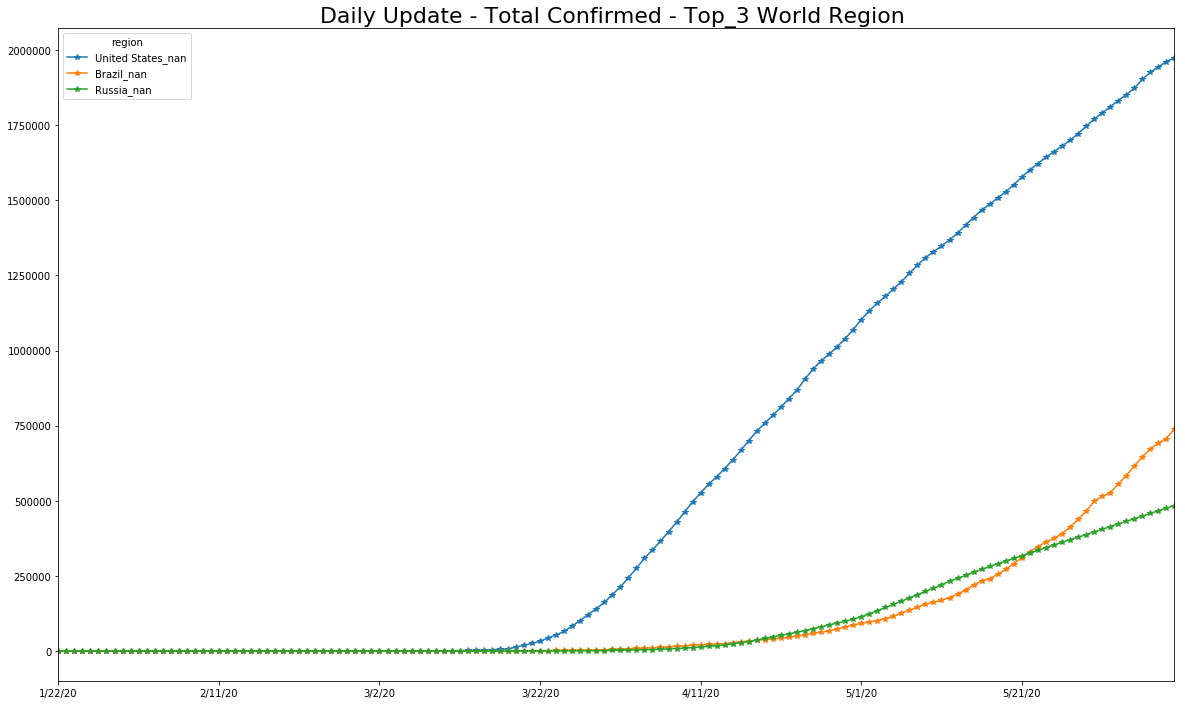

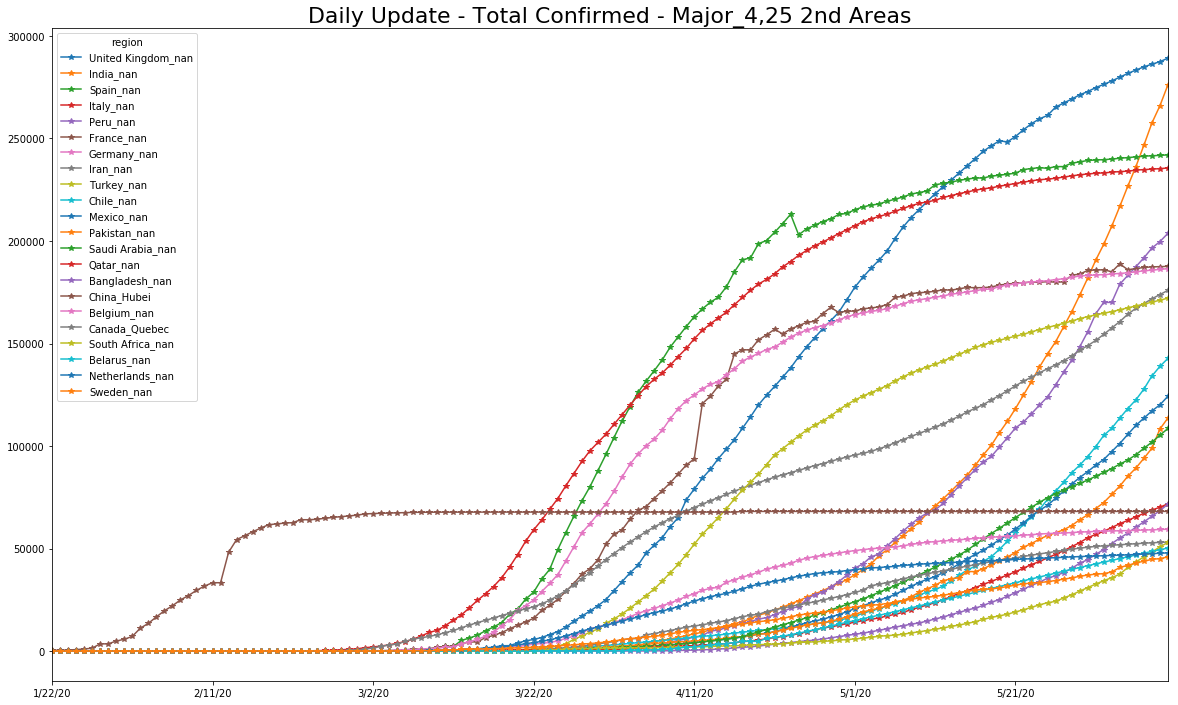

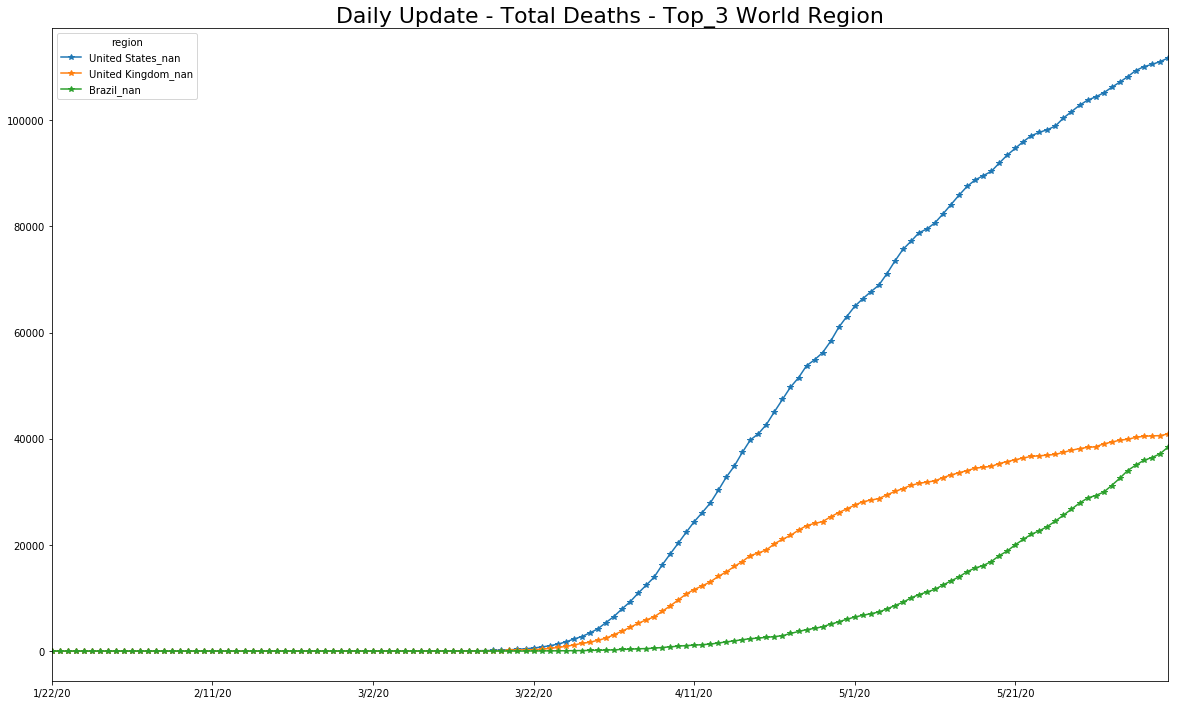

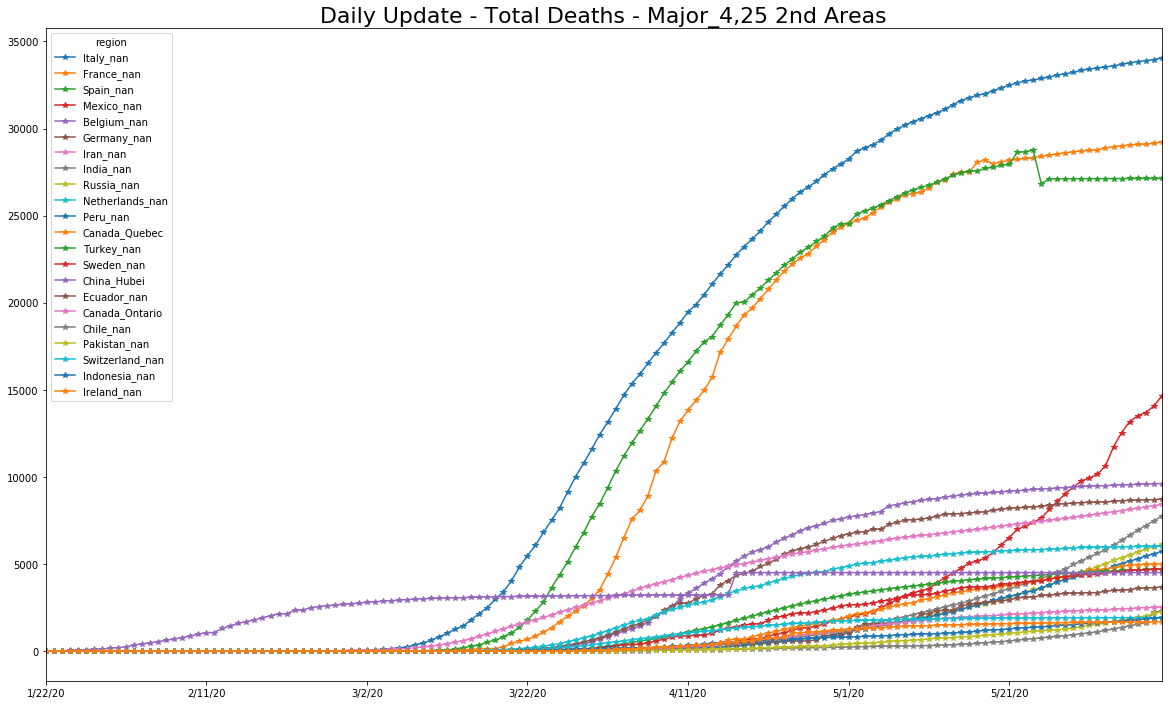

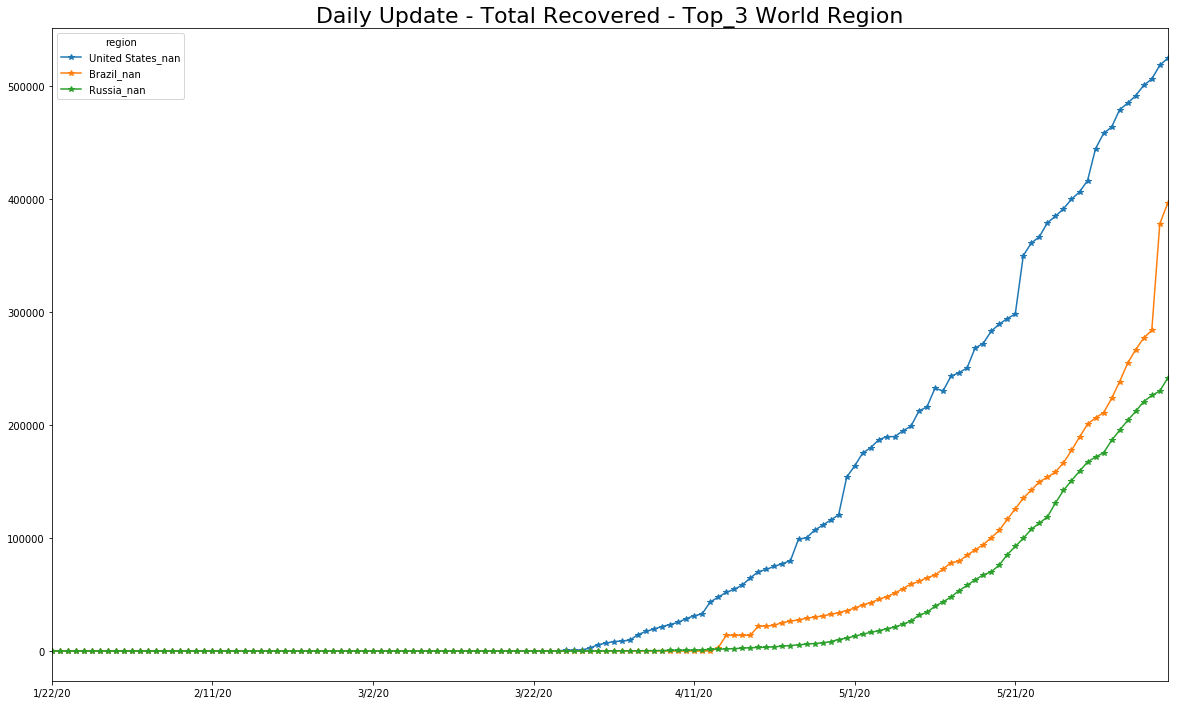

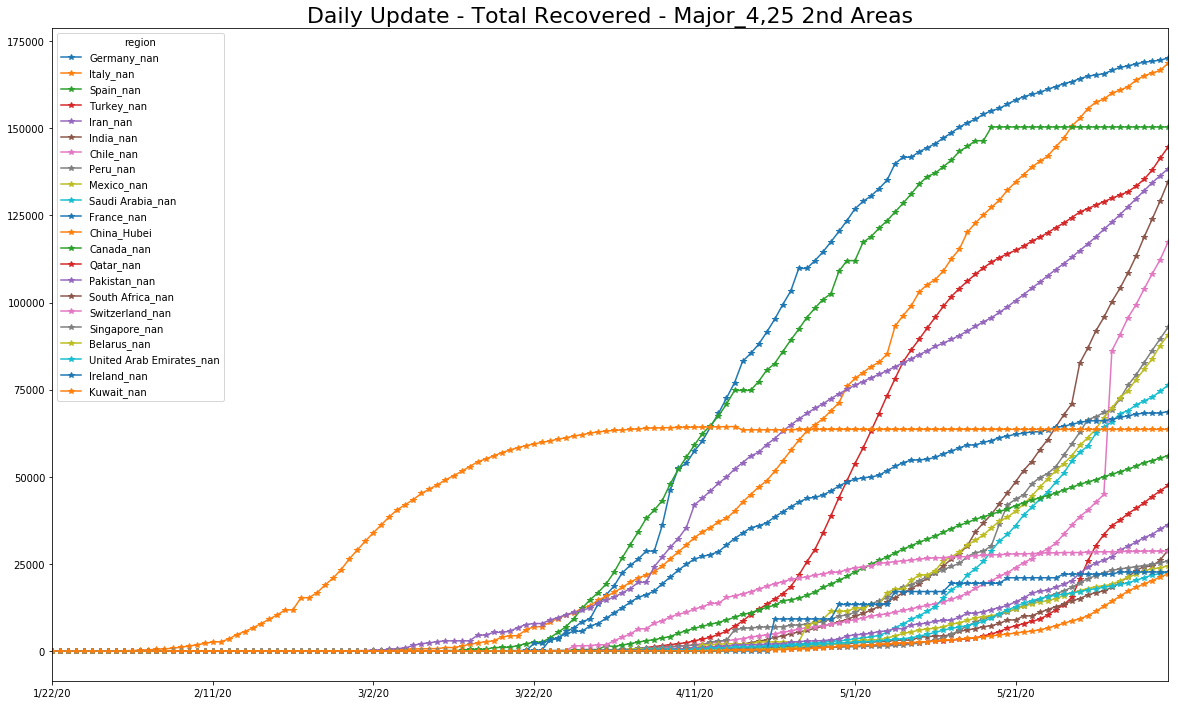

In [16]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [17]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [18]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Taiwan*_nan',
        'Turkey_nan', 
        'Vietnam_nan',
       ]
#

#### Weather History

In [19]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/06/10


In [20]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [21]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [22]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 26/02 as
### they are too in the Past and model no longuer trains in China Hubei only!

ts=ts[15:]
ts_d=ts_d[15:]
ts_rec=ts_rec[15:]

In [23]:
ts[:3]

region  Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/6/20                0            0            0            0           0   
2/7/20                0            0            0            0           0   
2/8/20                0            0            0            0           0   

region  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/6/20                        0              0            0   
2/7/20                        0              0            0   
2/8/20                        0              0            0   

region  Australia_Australian Capital Territory  Australia_New South Wales  \
2/6/20                                       0                          4   
2/7/20                                       0                          4   
2/8/20                                       0                          4   

region  ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
2/6/20  ...                 11            0               0              0   
2/7/20  ...                 11            0               0              0   
2/8/20  ...                 11            0               0              0   

region  Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
2/6/20           10                       0                   0          0   
2/7/20           10                       0                   0          0   
2/8/20           13                       0                   0          0   

region  Zambia_nan  Zimbabwe_nan  
2/6/20           0             0  
2/7/20           0             0  
2/8/20           0             0  

[3 rows x 266 columns]

In [24]:
ts[-4:]

region  Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
6/6/20            19551         1232        10050          852          88   
6/7/20            20342         1246        10154          852          91   
6/8/20            20917         1263        10265          852          92   
6/9/20            21459         1299        10382          852          96   

region  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
6/6/20                       26          22020        12364   
6/7/20                       26          22794        13130   
6/8/20                       26          23620        13325   
6/9/20                       26          24761        13675   

region  Australia_Australian Capital Territory  Australia_New South Wales  \
6/6/20                                     108                       3109   
6/7/20                                     108                       3112   
6/8/20                                     108                       3114   
6/9/20                                     108                       3117   

region  ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
6/6/20  ...            1925765          845            4094           2316   
6/7/20  ...            1943882          845            4331           2377   
6/8/20  ...            1961428          845            4440           2473   
6/9/20  ...            1973230          846            4520           2632   

region  Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
6/6/20          329                     464                   9        482   
6/7/20          331                     472                   9        484   
6/8/20          332                     473                   9        496   
6/9/20          332                     481                   9        524   

region  Zambia_nan  Zimbabwe_nan  
6/6/20        1089           279  
6/7/20        1089           282  
6/8/20        1200           287  
6/9/20        1200           314  

[4 rows x 266 columns]

In [25]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [26]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
19    2020-02-25  Afghanistan_nan          1             1             1   
20    2020-02-26  Afghanistan_nan          1             0             1   
21    2020-02-27  Afghanistan_nan          1             0             1   
22    2020-02-28  Afghanistan_nan          1             0             0   
23    2020-02-29  Afghanistan_nan          1             0             0   
24    2020-03-01  Afghanistan_nan          1             0             0   
25    2020-03-02  Afghanistan_nan          1             0             0   
26    2020-03-03  Afghanistan_nan          1             0             0   
27    2020-03-04  Afghanistan_nan          1             0             0   
28    2020-03-05  Afghanistan_nan          1             0             0   
29    2020-03-06  Afghanistan_nan          1             0             0   
30    2020-03-07  Afghanistan_nan          1             0             0   
31    2020-03-08  Afghanistan_nan          4             0             0   
32    2020-03-09  Afghanistan_nan          4             3             3   
33    2020-03-10  Afghanistan_nan          5             0             3   
34    2020-03-11  Afghanistan_nan          7             1             4   
35    2020-03-12  Afghanistan_nan          7             2             3   
36    2020-03-13  Afghanistan_nan          7             0             3   
37    2020-03-14  Afghanistan_nan         11             0             2   
38    2020-03-15  Afghanistan_nan         16             4             4   
39    2020-03-16  Afghanistan_nan         21             5             9   
40    2020-03-17  Afghanistan_nan         22             5            14   
41    2020-03-18  Afghanistan_nan         22             1            11   
42    2020-03-19  Afghanistan_nan         22             0             6   
43    2020-03-20  Afghanistan_nan         24             0             1   
44    2020-03-21  Afghanistan_nan         24             2             2   
45    2020-03-22  Afghanistan_nan         40             0             2   
46    2020-03-23  Afghanistan_nan         40            16            18   
47    2020-03-24  Afghanistan_nan         74             0            16   
48    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
33738 2020-05-12     Zimbabwe_nan         36             0             2   
33739 2020-05-13     Zimbabwe_nan         37             0             1   
33740 2020-05-14     Zimbabwe_nan         37             1             1   
33741 2020-05-15     Zimbabwe_nan         42             0             1   
33742 2020-05-16     Zimbabwe_nan         42             5             6   
33743 2020-05-17     Zimbabwe_nan         44             0             5   
33744 2020-05-18     Zimbabwe_nan         46             2             7   
33745 2020-05-19     Zimbabwe_nan         46             2             4   
33746 2020-05-20     Zimbabwe_nan         48             0             4   
33747 2020-05-21     Zimbabwe_nan         51             2             4   
33748 2020-05-22     Zimbabwe_nan         51             3             5   
33749 2020-05-23     Zimbabwe_nan         56             0             5   
33750 2020-05-24     Zimbabwe_nan         56             5             8   
33751 2020-05-25     Zimbabwe_nan         56             0             5   
33752 2020-05-26     Zimbabwe_nan         56             0             5   
33753 2020-05-27     Zimbabwe_nan        132             0             0   
33754 2020-05-28     Zimbabwe_nan        149            76            76   
33755 2020-05-29     Zimbabwe_nan        149            17            93   
33756 2020-05-30     Zimbabwe_nan        174             0            93   
33757 2020-05-31     Zimbabwe_nan        178            25            42   
33758 2020-06-01     Zimbabwe_nan        203             4  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
33767 2020-06-10  Zimbabwe_nan          0            27            35   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
33767           108          109.41115         112.548387         152.432039   

       last_day  kalman_prediction  population  infected_rate  min  max  
33767       314              324.0    10000000   3.150000e-07  NaN  NaN

In [39]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="Shared -- Ratio in Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage_infected_rate_confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage_factor_9.8_10_infected_rate_confirmed']=ratiod['infected_rate']*100*9.8
ratiod['delta_new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta_new_cases_per_1M_hab']=ratiod['delta_new_cases']/ratiod['population']*1000000

ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)

ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
33765  2020-06-08  Zimbabwe_nan        287             3            45   
33766  2020-06-09  Zimbabwe_nan        314             5            22   
33767  2020-06-10  Zimbabwe_nan          0            27            35   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
33765           104         101.078853         118.991561         158.432584   
33766            84         101.776596         108.305660         141.384236   
33767           108         109.411150         112.548387         152.432039   

       last_day  kalman_prediction  population  infected_rate  min  max  \
33765       282              303.0    10000000   2.830000e-07  NaN  NaN   
33766       287              308.0    10000000   2.880000e-07  NaN  NaN   
33767       314              324.0    10000000   3.150000e-07  NaN  NaN   

       population_percentage_infected_rate_confirmed  \
33765                                       0.000028   
33766                                       0.000029   
33767                                       0.000031   

       population_percentage_factor_9.8_10_infected_rate_confirmed  \
33765                                           0.000277             
33766                                           0.000282             
33767                                           0.000309             

       delta_new_cases  delta_new_cases_per_1M_hab  
33765             21.0                         2.1  
33766             21.0                         2.1  
33767             10.0                         1.0

## Kalman 1 day Prediction with Evaluation

                region           mse           rmse        mae
256  United States_nan  3.203418e+10  178980.950426  19706.464


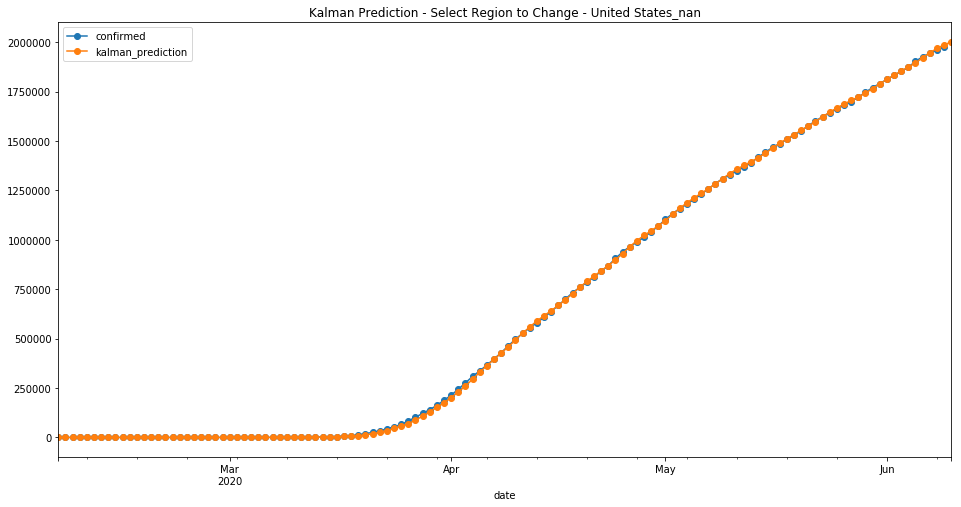

In [40]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse       mae
208  Russia_nan  1.950219e+09  44161.287098  4709.312


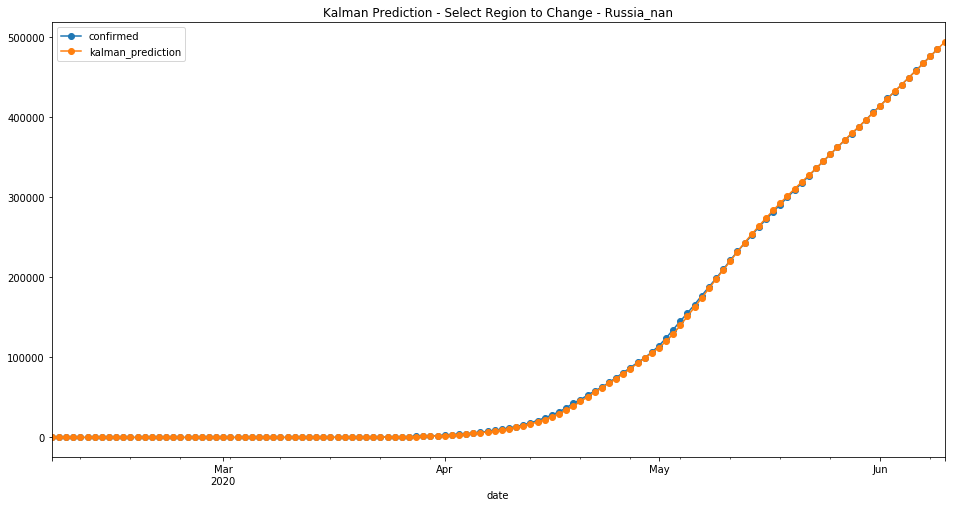

In [41]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse       mae
30  Brazil_nan  4.693077e+09  68506.034227  8237.656


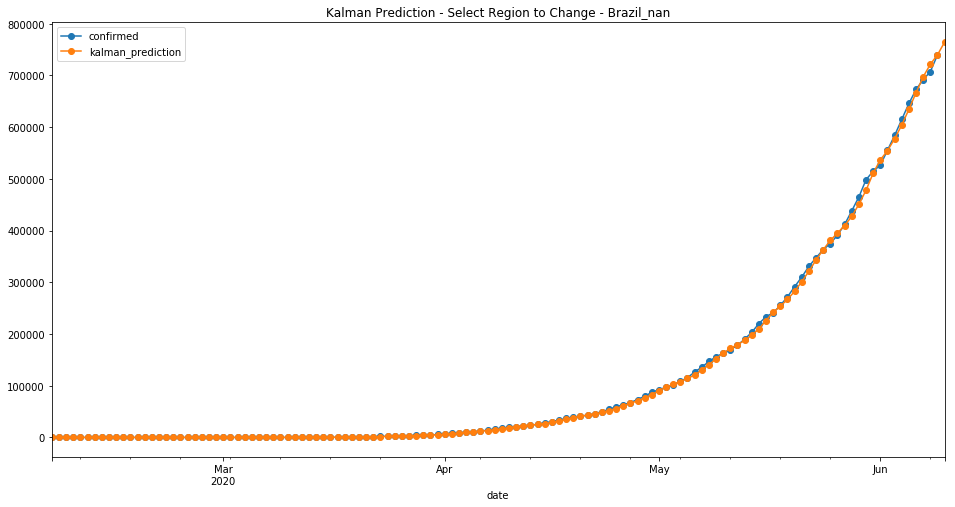

In [42]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse       mae
255  United Kingdom_nan  6.772458e+08  26023.946329  3052.768


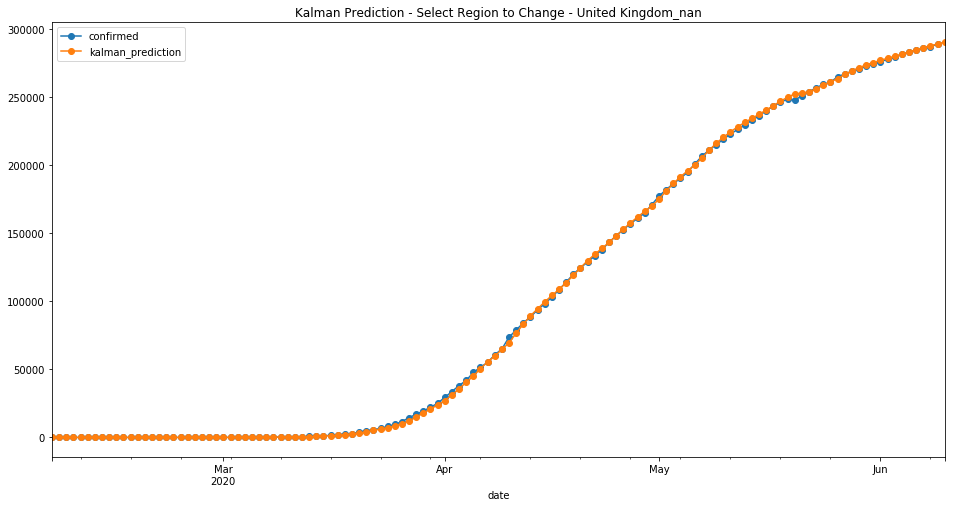

In [43]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [44]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='5G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4gwvqxqi
  JVM stdout: /tmp/tmp4gwvqxqi/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4gwvqxqi/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         02 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 7 months and 14 days !!!
H2O cluster name:           H2O_from_python_unknownUser_mjsstd
H2O cluster total nodes:    1
H2O cluster free memory:    5 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [45]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-77)).strftime('%Y-%m-%d') # 11 weeks =77 days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-03-25
last_train_date= 2020-06-09
first_bootstrap_date= 2020-06-01
boost_bootstrap_date= 2020-06-06
first_test_date= 2020-05-31
last_test_date= 2020-06-10
first_valid_date= 2020-06-08


In [46]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [47]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [48]:
pred2.iloc[:25]

0  confirmed       date           region
0   15892.0      15750 2020-06-01  Afghanistan_nan
1   16373.0      16509 2020-06-02  Afghanistan_nan
2   17288.0      17267 2020-06-03  Afghanistan_nan
3   18034.0      18054 2020-06-04  Afghanistan_nan
4   18828.0      18969 2020-06-05  Afghanistan_nan
5   19824.0      19551 2020-06-06  Afghanistan_nan
6   20213.0      20342 2020-06-07  Afghanistan_nan
7   21160.0      20917 2020-06-08  Afghanistan_nan
8   21617.0      21459 2020-06-09  Afghanistan_nan
9   22140.0          0 2020-06-10  Afghanistan_nan
10   1157.0       1143 2020-06-01      Albania_nan
11   1159.0       1164 2020-06-02      Albania_nan
12   1190.0       1184 2020-06-03      Albania_nan
13   1207.0       1197 2020-06-04      Albania_nan
14   1215.0       1212 2020-06-05      Albania_nan
15   1231.0       1232 2020-06-06      Albania_nan
16   1254.0       1246 2020-06-07      Albania_nan
17   1263.0       1263 2020-06-08      Albania_nan
18   1282.0       1299 2020-06-09      Albania_nan
19   1329.0          0 2020-06-10      Albania_nan
20   9581.0       9513 2020-06-01      Algeria_nan
21   9690.0       9626 2020-06-02      Algeria_nan
22   9793.0       9733 2020-06-03      Algeria_nan
23   9892.0       9831 2020-06-04      Algeria_nan
24   9980.0       9935 2020-06-05      Algeria_nan

In [49]:
pred2.iloc[175:195]

0  confirmed       date          region
175   7158.0       7239 2020-06-06  Azerbaijan_nan
176   7567.0       7553 2020-06-07  Azerbaijan_nan
177   7846.0       7876 2020-06-08  Azerbaijan_nan
178   8190.0       8191 2020-06-09  Azerbaijan_nan
179   8513.0          0 2020-06-10  Azerbaijan_nan
180    107.0        102 2020-06-01     Bahamas_nan
181    107.0        102 2020-06-02     Bahamas_nan
182    107.0        102 2020-06-03     Bahamas_nan
183    106.0        102 2020-06-04     Bahamas_nan
184    106.0        102 2020-06-05     Bahamas_nan
185    106.0        103 2020-06-06     Bahamas_nan
186    108.0        103 2020-06-07     Bahamas_nan
187    107.0        103 2020-06-08     Bahamas_nan
188    107.0        103 2020-06-09     Bahamas_nan
189    107.0          0 2020-06-10     Bahamas_nan
190  11874.0      11871 2020-06-01     Bahrain_nan
191  12273.0      12311 2020-06-02     Bahrain_nan
192  12717.0      12815 2020-06-03     Bahrain_nan
193  13295.0      13296 2020-06-04     Bahrain_nan
194  13776.0      13835 2020-06-05     Bahrain_nan

In [50]:
pred2.iloc[220:240]

0  confirmed       date       region
220  43438.0      43403 2020-06-01  Belarus_nan
221  44250.0      44255 2020-06-02  Belarus_nan
222  45104.0      45116 2020-06-03  Belarus_nan
223  45965.0      45981 2020-06-04  Belarus_nan
224  46823.0      46868 2020-06-05  Belarus_nan
225  47715.0      47751 2020-06-06  Belarus_nan
226  48589.0      48630 2020-06-07  Belarus_nan
227  49463.0      49453 2020-06-08  Belarus_nan
228  50254.0      50265 2020-06-09  Belarus_nan
229  51064.0          0 2020-06-10  Belarus_nan
230  58512.0      58517 2020-06-01  Belgium_nan
231  58607.0      58615 2020-06-02  Belgium_nan
232  58679.0      58685 2020-06-03  Belgium_nan
233  58733.0      58767 2020-06-04  Belgium_nan
234  58816.0      58907 2020-06-05  Belgium_nan
235  58977.0      59072 2020-06-06  Belgium_nan
236  59141.0      59226 2020-06-07  Belgium_nan
237  59279.0      59348 2020-06-08  Belgium_nan
238  59384.0      59437 2020-06-09  Belgium_nan
239  59461.0          0 2020-06-10  Belgium_nan

In [51]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [52]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data',model_v2.r2(valid=True))

# MSE on the training data =  4961703.78272597
# MSE on the validation data =  37097986095.09928
# R^2 on the training data =  0.9998734390958726
# R^2 on the validation data 0.5653990997888125


In [53]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1591787560847_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 4961703.78272597
RMSE: 2227.4882228029783
MAE: 451.1563927311701
RMSLE: 0.29109131051962317
Mean Residual Deviance: 4961703.78272597

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 37097986095.09928
RMSE: 192608.37493499415
MAE: 51108.72491377781
RMSLE: 5.989259593579548
Mean Residual Deviance: 37097986095.09928
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2020-06-10 11:12:48  0.082 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2020-06-10 11:12:48  0.473 sec   1.0                7191.52450281975    1363.426889886123   51718024.674656846   204474.54416557544  53907.88756045387   41809839211.719864
     2020-06-10 11:12:48  0.640 sec   2.0                6989.420628384364   1336.7914467332778  48852000.720484875   211686.65951591867  53659.187319946286  44811241817.00848
     2020-06-10 11:12:48  0.727 sec   3.0                6473.584873953712   1272.4016473602524  41907301.1202823     211373.22124755685  53304.319613756445  44678638660.56862
     2020-06-10 11:12:48  0.818 sec   4.0                6393.274856164432   1251.8316250357038  40873963.38646434    211634.72091040172  53108.55472980681   44789255094.82362
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2020-06-10 11:12:56  8.187 sec   107.0              2526.7452095473427  514.7441028449863   6384441.353970444    189746.745149215    51148.21586140258   36003827294.72115
     2020-06-10 11:13:00  12.187 sec  206.0              2320.459931573231   475.6691850465067   5384534.294036844    192989.19797117583  51130.58839680092   37244830533.5577
     2020-06-10 11:13:04  16.221 sec  321.0              2260.345053608846   460.93204861602663  5109159.761373975    192455.69672759197  51066.6172103368    37039195202.902855
     2020-06-10 11:13:08  20.230 sec  440.0              2179.8497766301     445.5585869390908   4751745.048674298    192908.66616076799  51111.92139478271   37213753479.92663
     2020-06-10 11:13:10  22.498 sec  500.0              2227.4882228029783  451.1563927311701   4961703.78272597     192608.37493499415  51108.72491377781   37097986095.09928


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
kalman_prediction  3.04266e+16            1                    0.361057
last_day           2.29731e+16            0.755033             0.27261
7_day_change       1.17144e+16            0.385006             0.139009
3_day_change       9.15283e+15            0.300817             0.108612
1_day_change       4.08956e+15            0.134408             0.0485288
infected_rate      2.50873e+15            0.0824518            0.0297698
region             2.05786e+15            0.0676337            0.0244196
7_day_change_rate  4.46933e+14            0.0146889            0.00530353
1_day_change_rate  3.32453e+14            0.0109264            0.00394505
max                2.42885e+14            0.00798266           0.0028822
3_day_change_rate  2.25706e+14            0.00741806           0.00267834
min                9.98204e+13            0.0032807            0.00118452

In [54]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         3.042659e+16           1.000000    0.361057
1            last_day         2.297307e+16           0.755033    0.272610
2        7_day_change         1.171441e+16           0.385006    0.139009
3        3_day_change         9.152833e+15           0.300817    0.108612
4        1_day_change         4.089564e+15           0.134408    0.048529
5       infected_rate         2.508728e+15           0.082452    0.029770
6              region         2.057863e+15           0.067634    0.024420
7   7_day_change_rate         4.469326e+14           0.014689    0.005304
8   1_day_change_rate         3.324530e+14           0.010926    0.003945
9                 max         2.428853e+14           0.007983    0.002882
10  3_day_change_rate         2.257064e+14           0.007418    0.002678
11                min         9.982043e+13           0.003281    0.001185

In [55]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


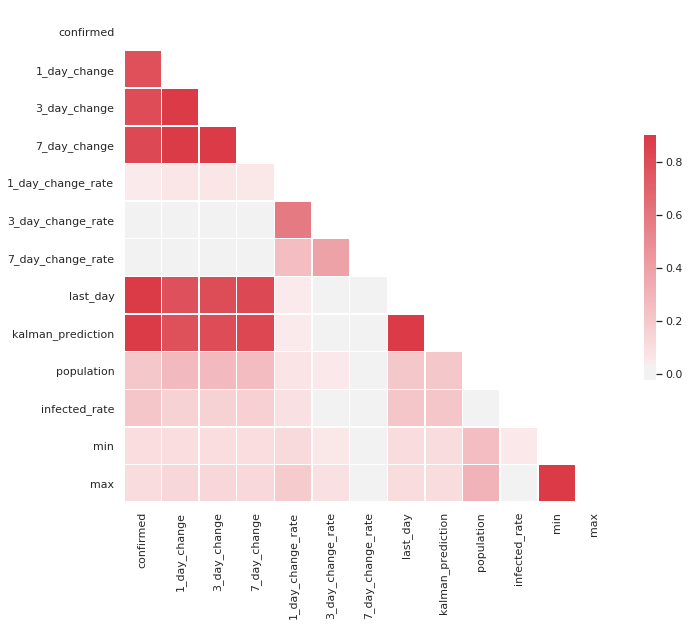

In [56]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [57]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.784874
3_day_change         0.806924
7_day_change         0.826157
1_day_change_rate    0.044589
3_day_change_rate    0.012603
7_day_change_rate   -0.007247
last_day             0.981180
kalman_prediction    0.981364
population           0.208984
infected_rate        0.213122
min                  0.106458
max                  0.112256
Name: confirmed, dtype: float64


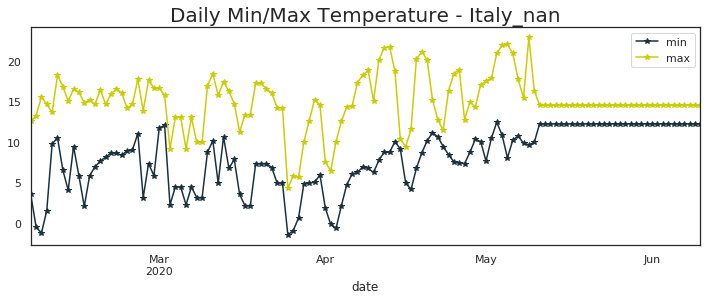

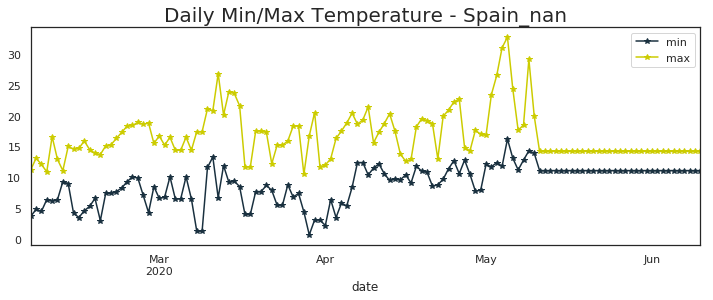

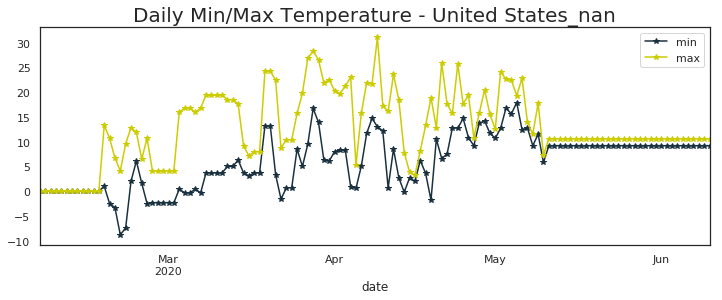

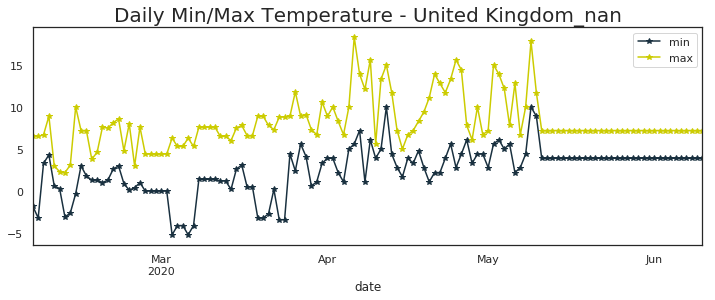

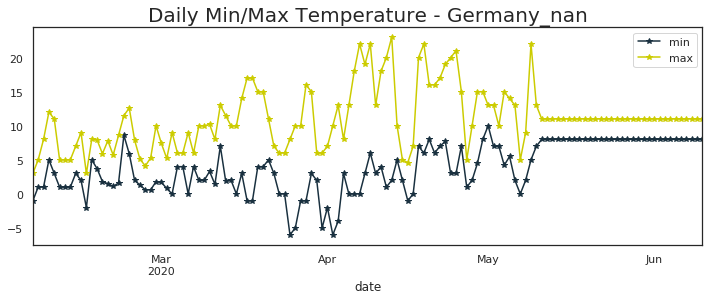

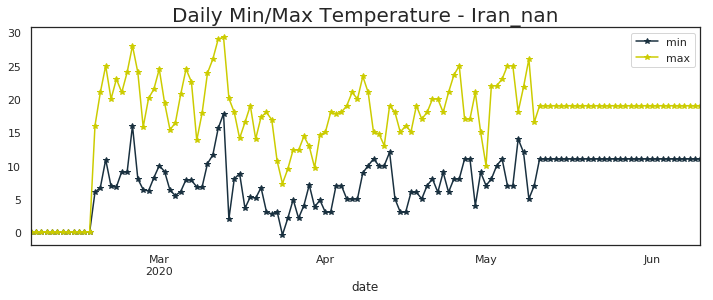

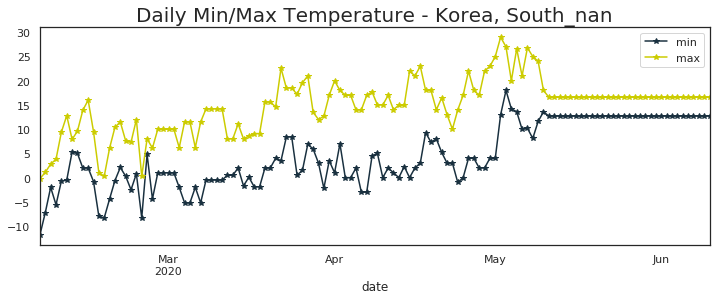

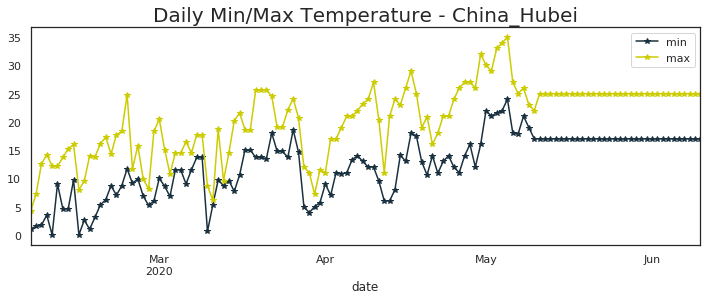

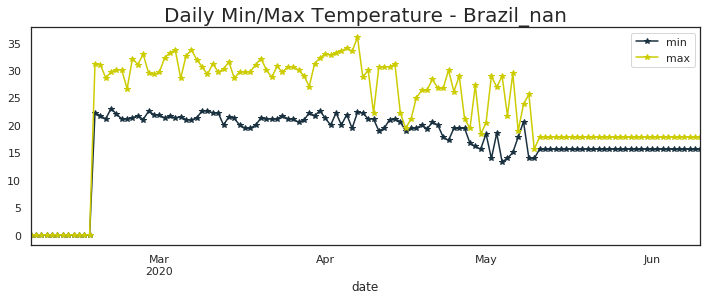

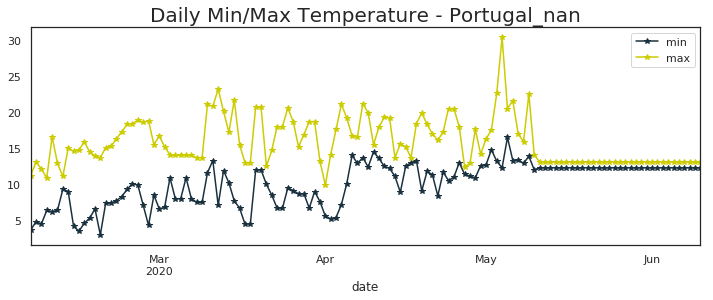

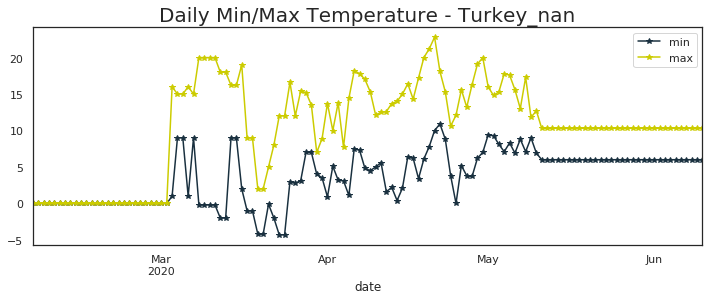

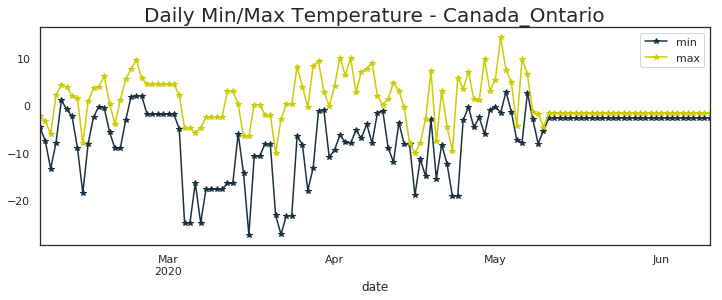

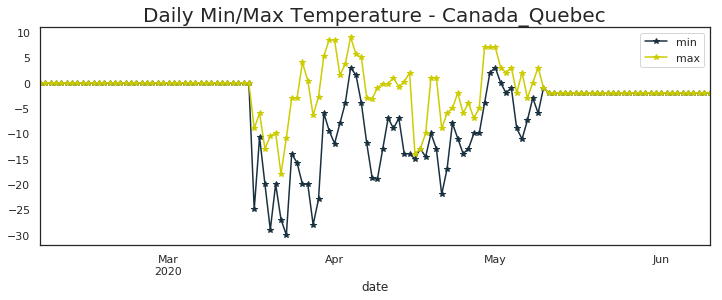

In [58]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [59]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.9  31.1
Brazil_nan                  23.0  36.0
Russia_nan                  13.0  30.0
United Kingdom_nan          10.0  18.3
India_nan                   30.0  43.0
Spain_nan                   16.2  32.7
Italy_nan                   12.4  22.9
Peru_nan                     0.0   0.0
France_nan                  14.2  23.8
Germany_nan                 10.0  23.0
Iran_nan                    17.8  29.3
Turkey_nan                  10.9  22.8
Chile_nan                    0.0   0.0
Mexico_nan                   0.0   0.0
Pakistan_nan                16.0  28.0
Saudi Arabia_nan             0.0   0.0
Qatar_nan                    0.0   0.0
Bangladesh_nan               0.0   0.0
China_Hubei                 24.0  35.0
Belgium_nan                 17.8  26.1
Canada_Quebec                3.0   9.0
South Africa_nan             0.0   0.0
Belarus_nan                 

### Kalman X Days Ahead Prediction

In [60]:
%%R

#install.packages('reshape')

NULL


In [61]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [62]:
all_new=%R all_new

In [63]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

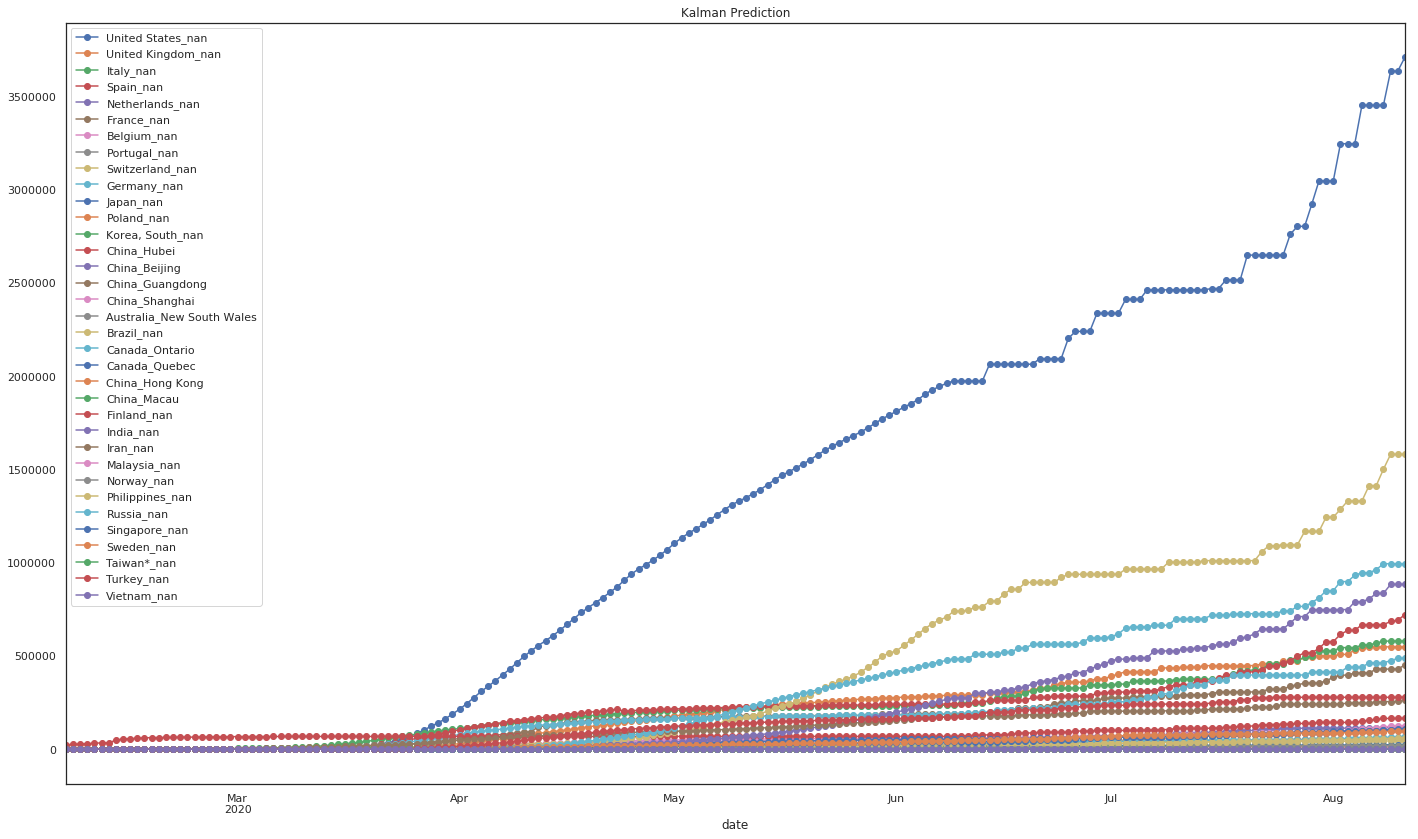

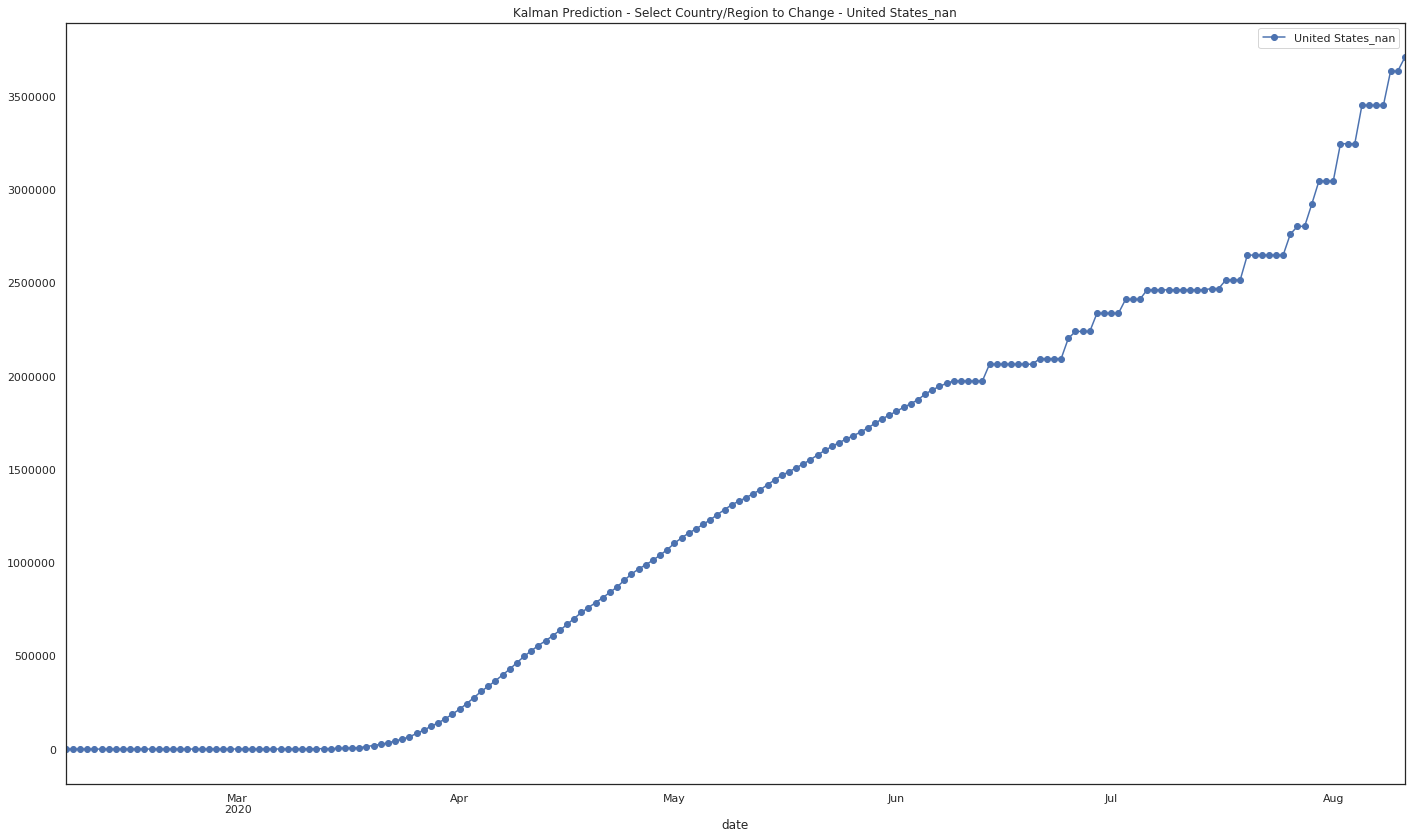

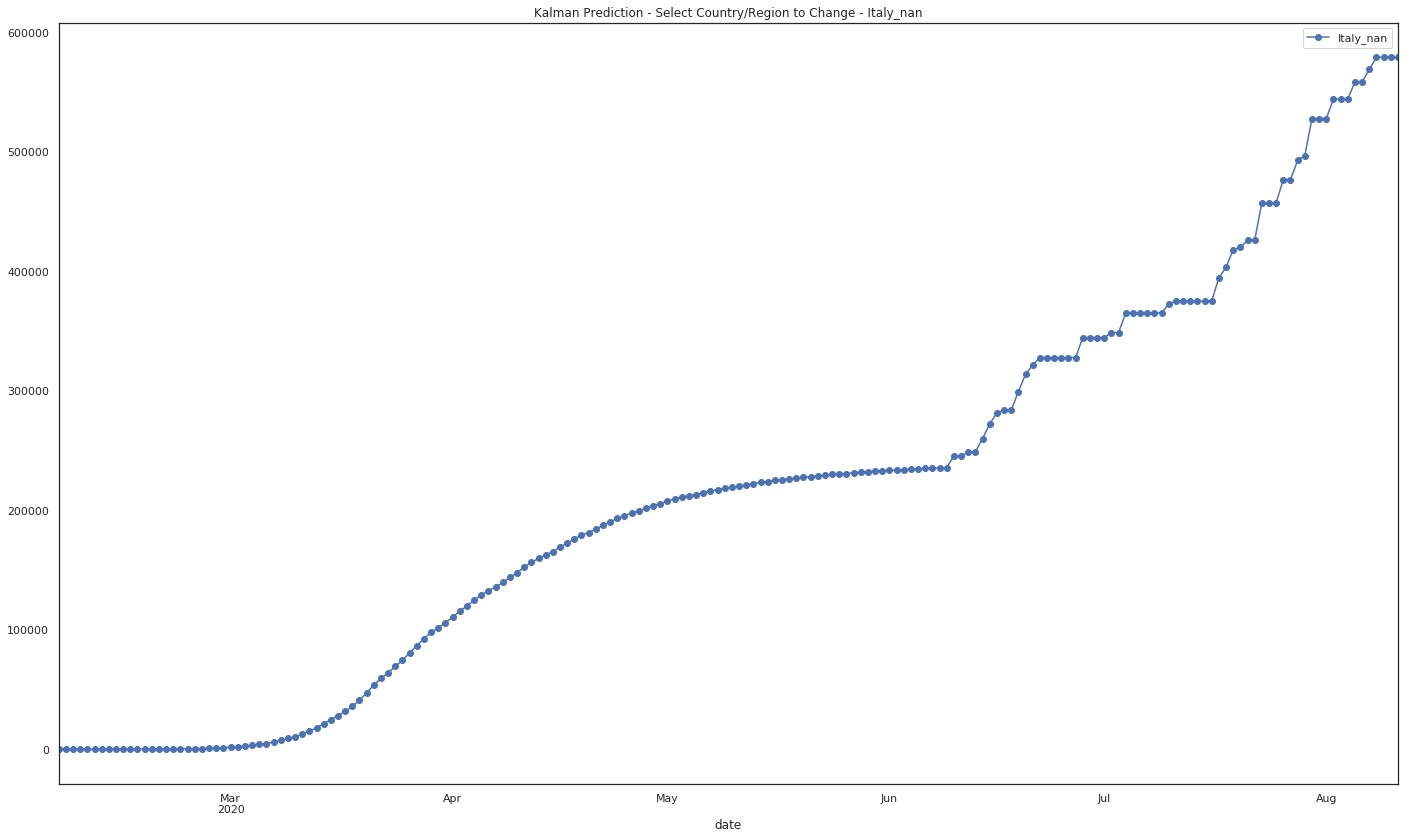

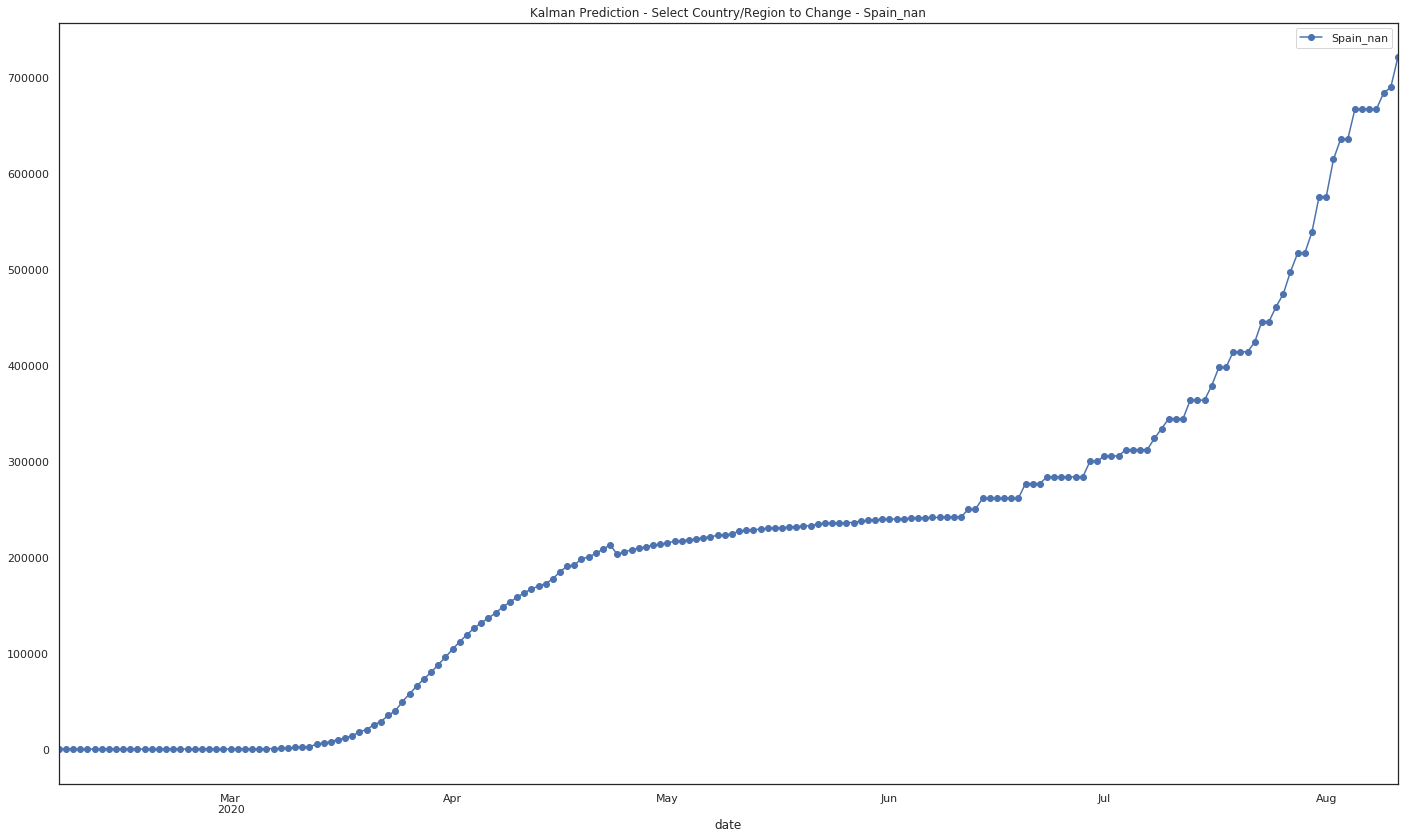

In [64]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


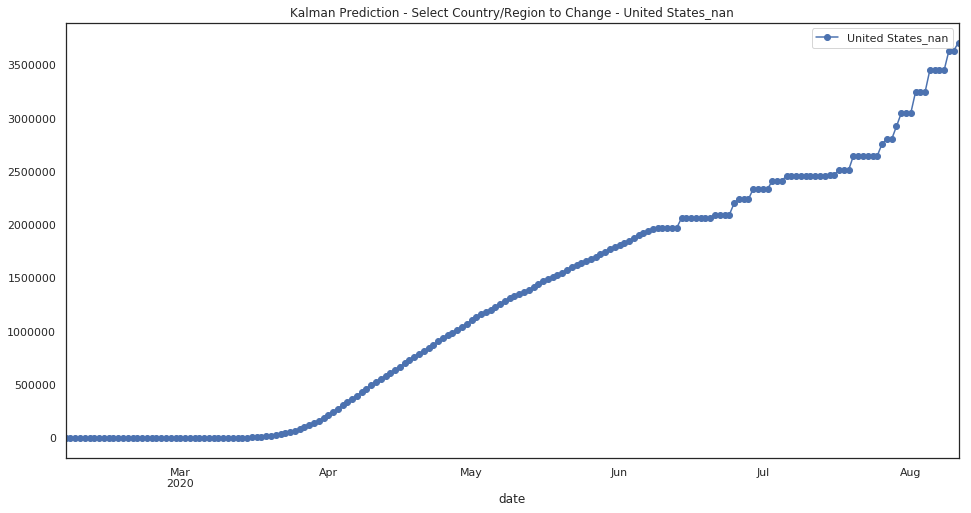

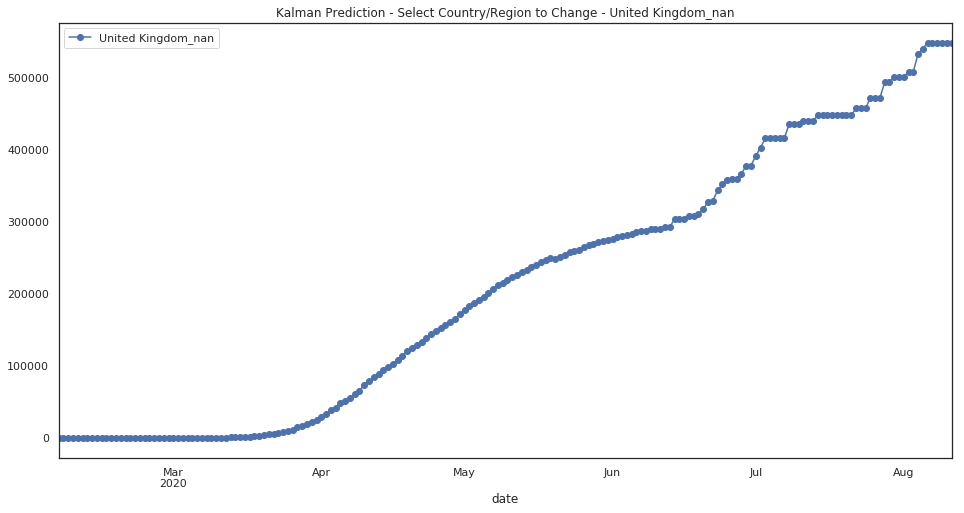

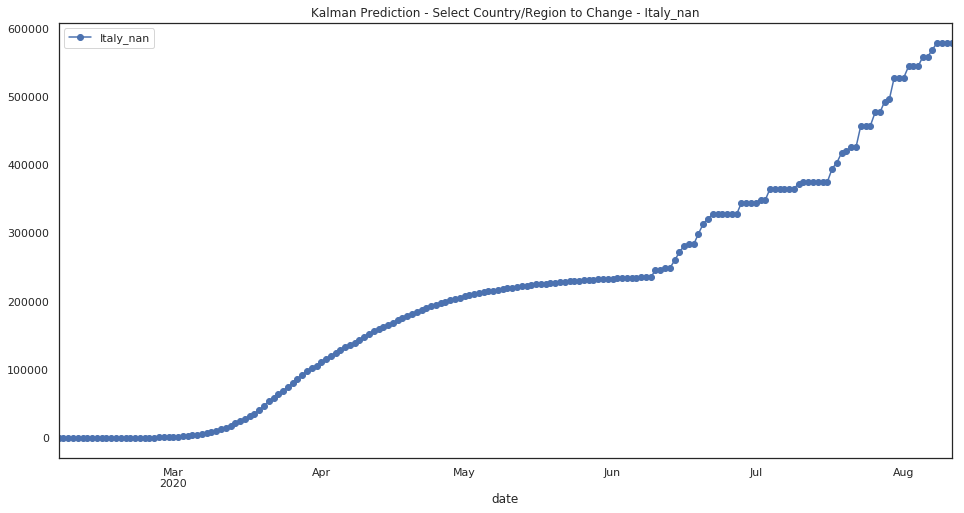

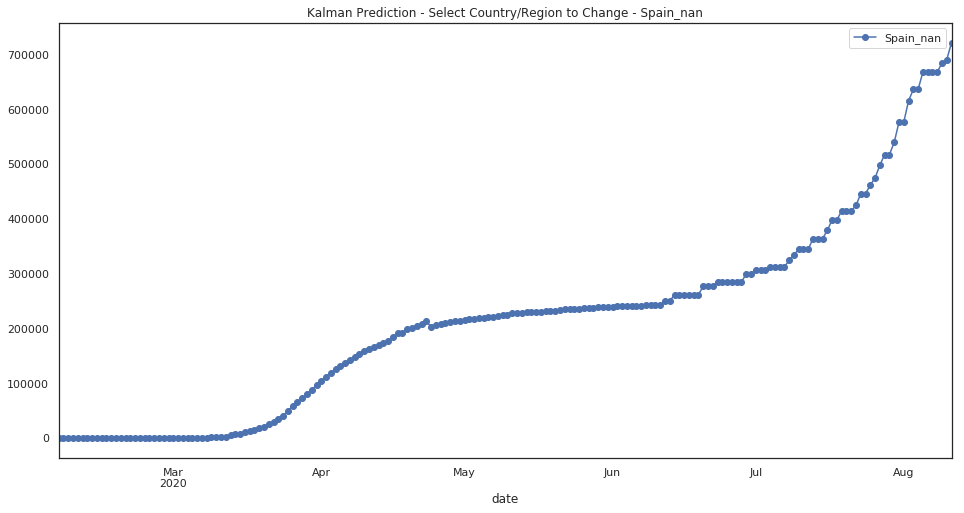

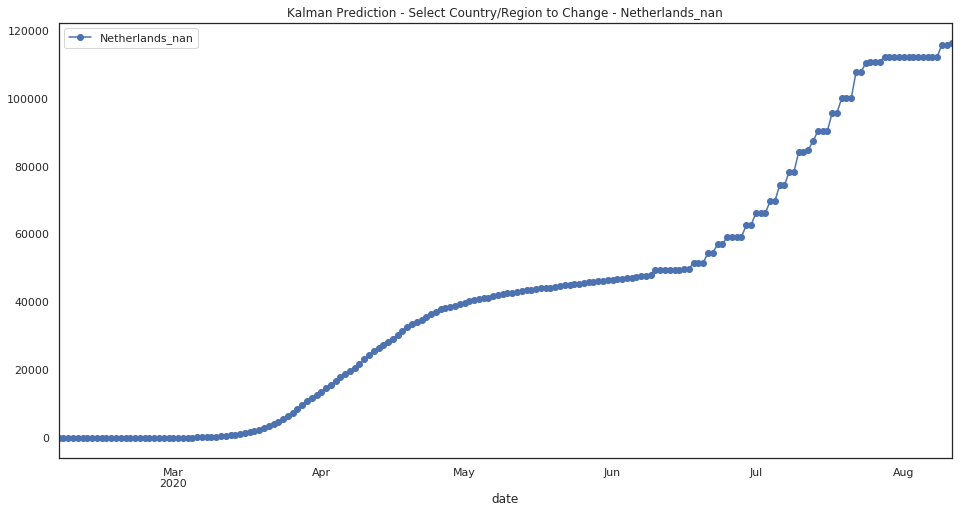

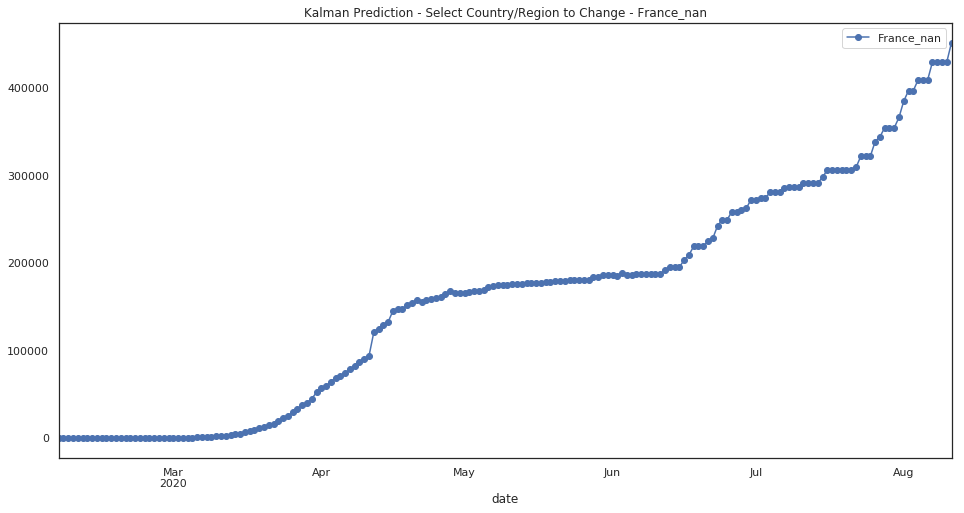

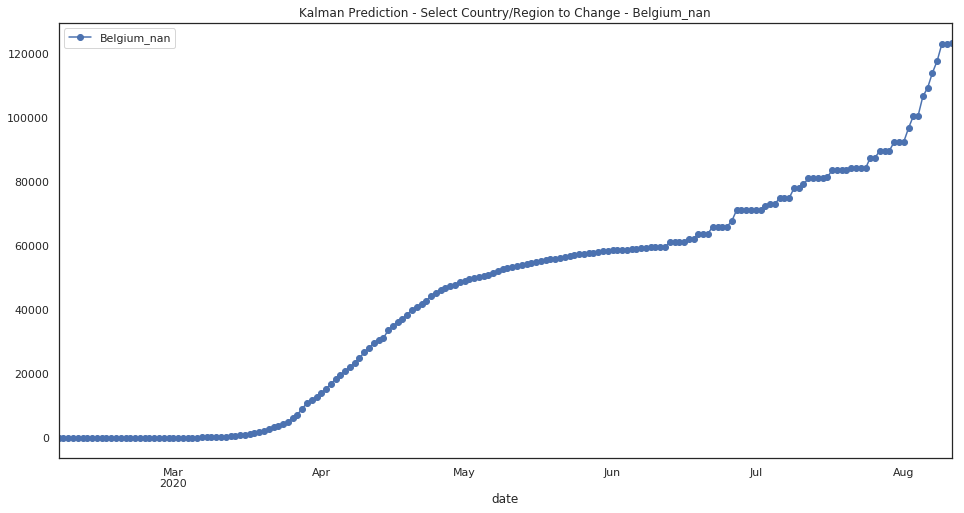

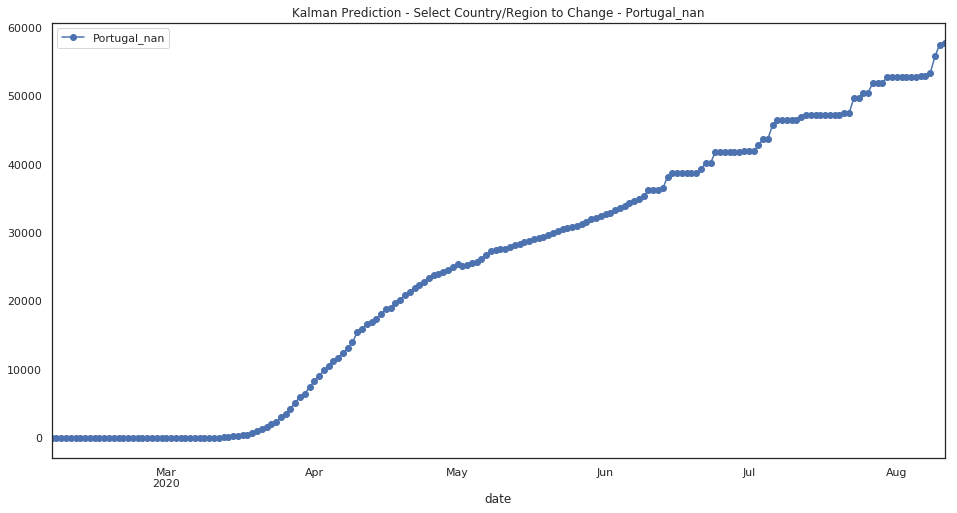

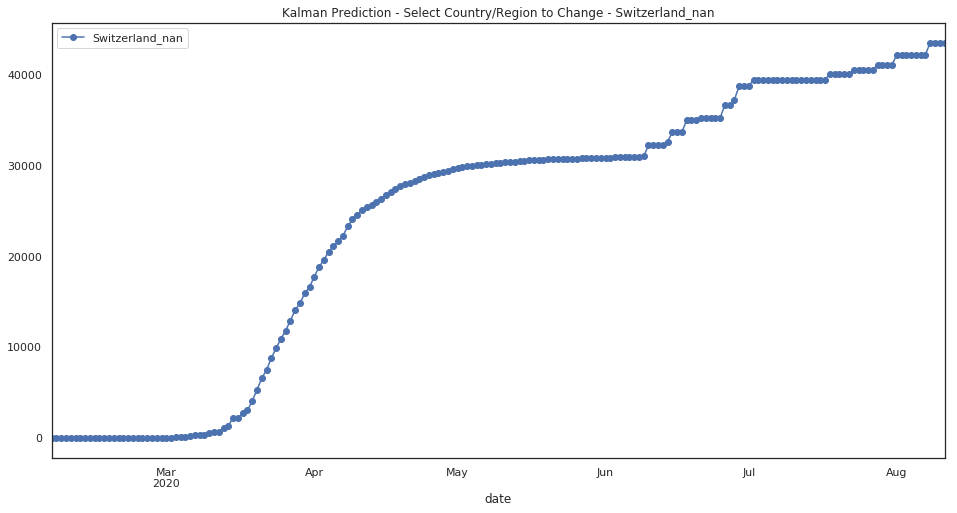

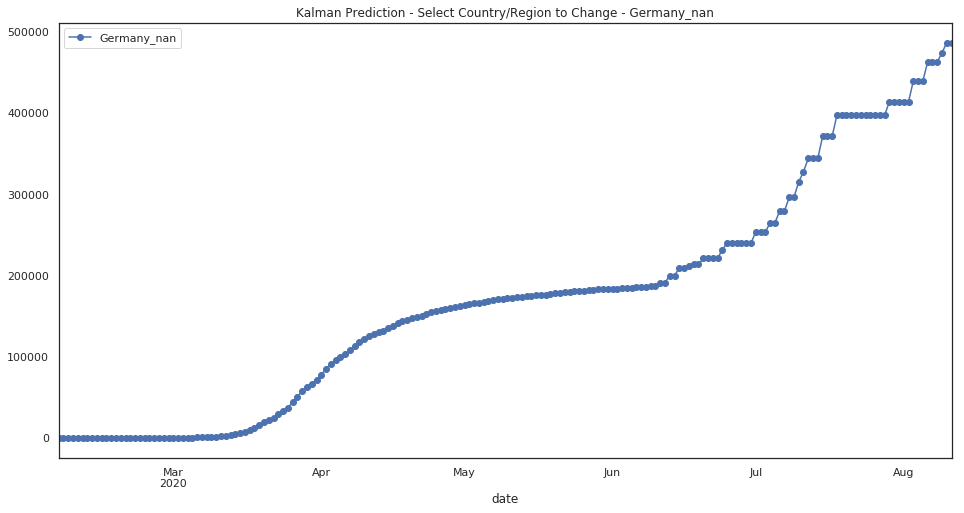

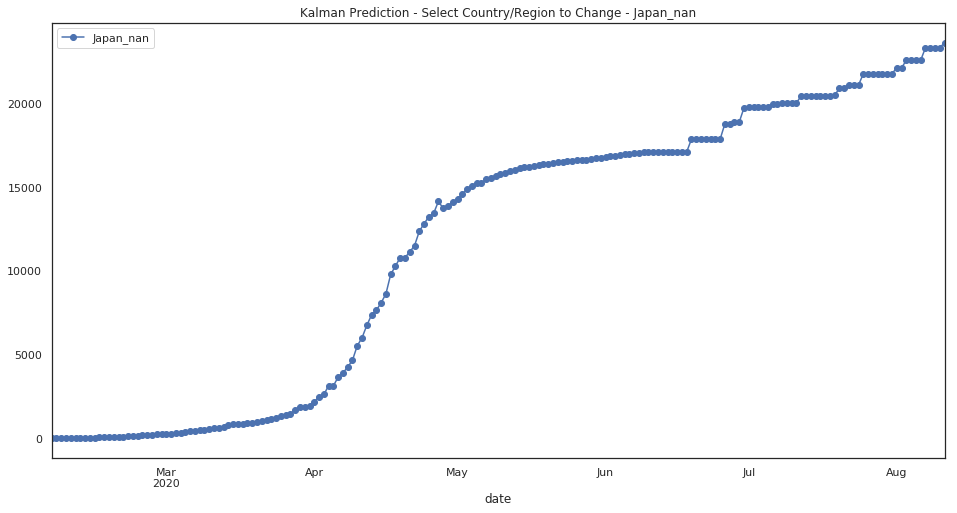

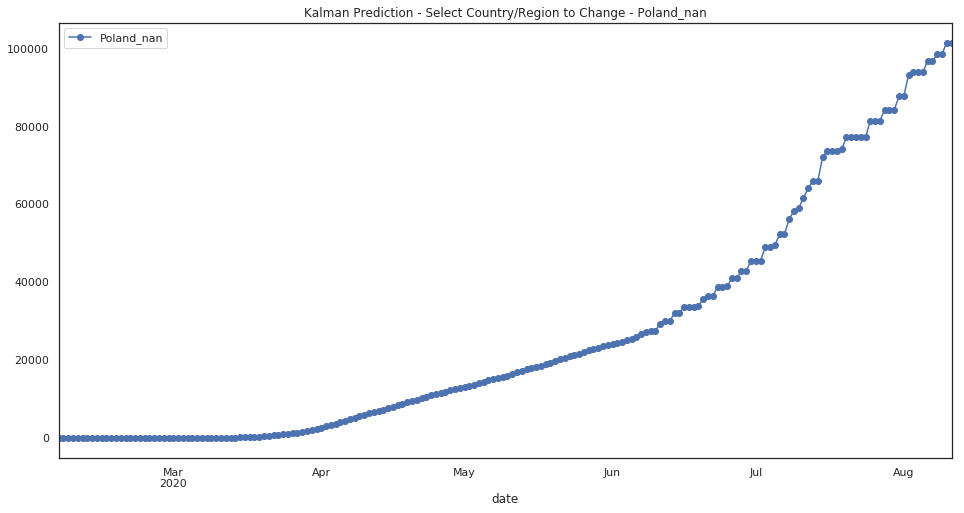

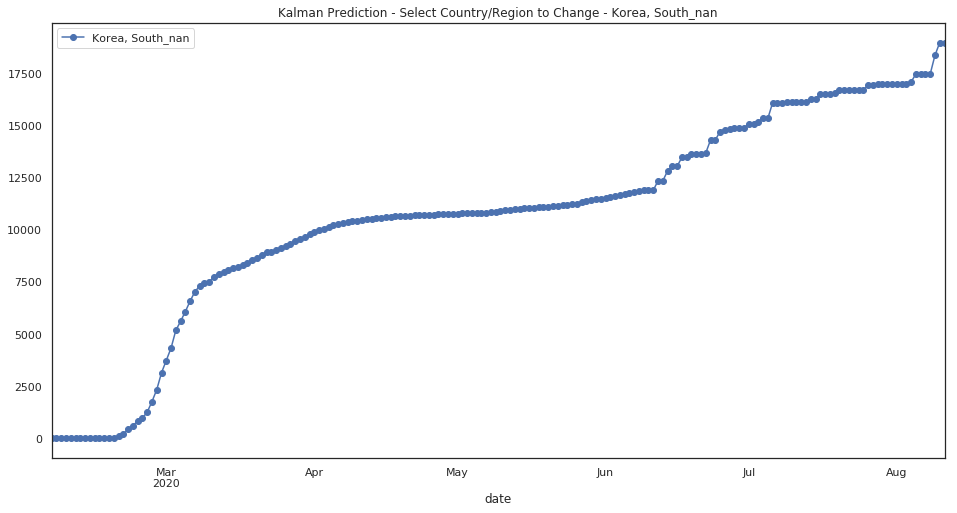

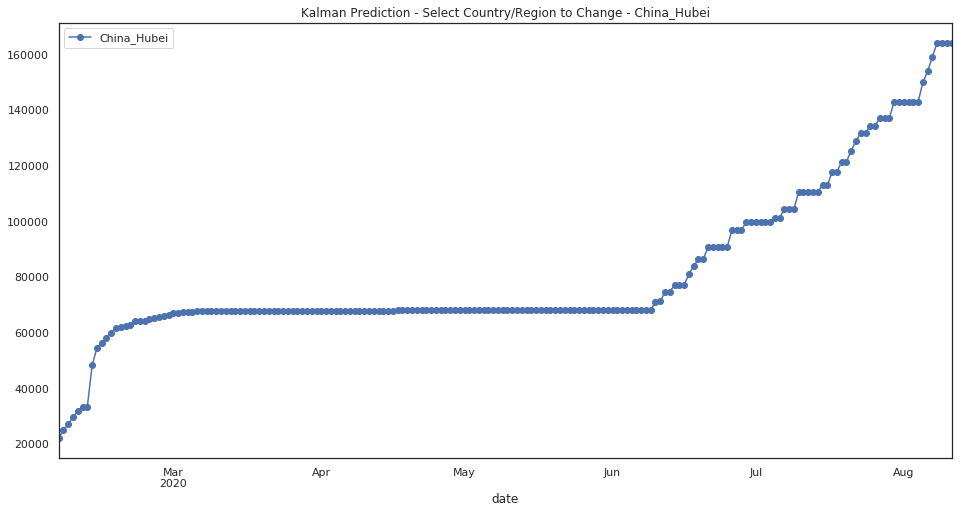

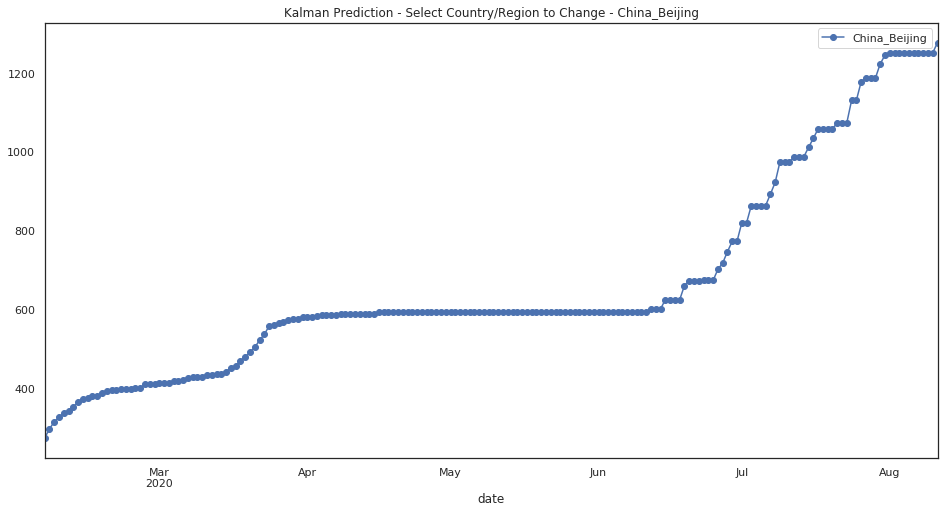

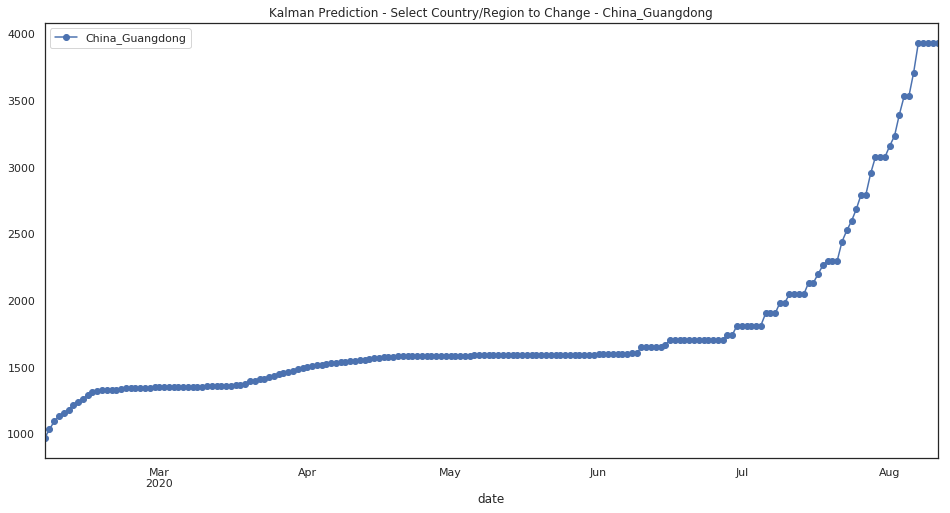

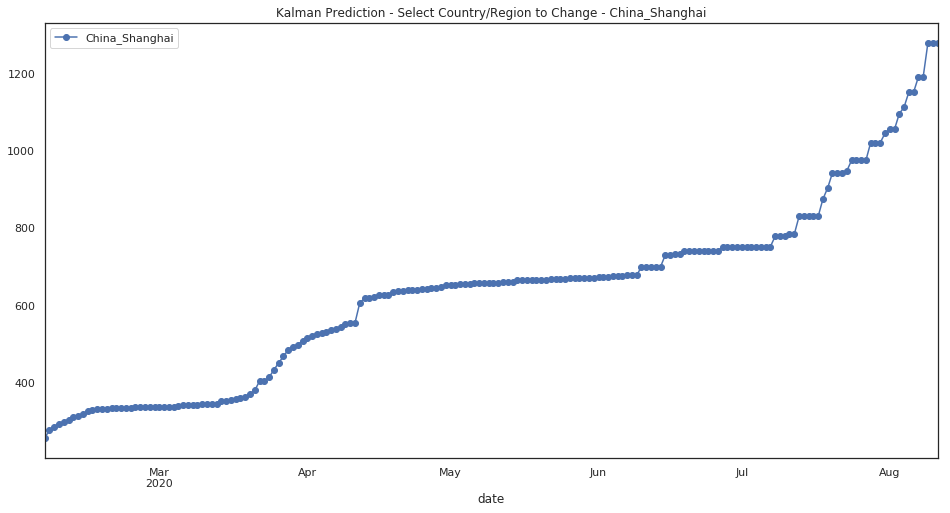

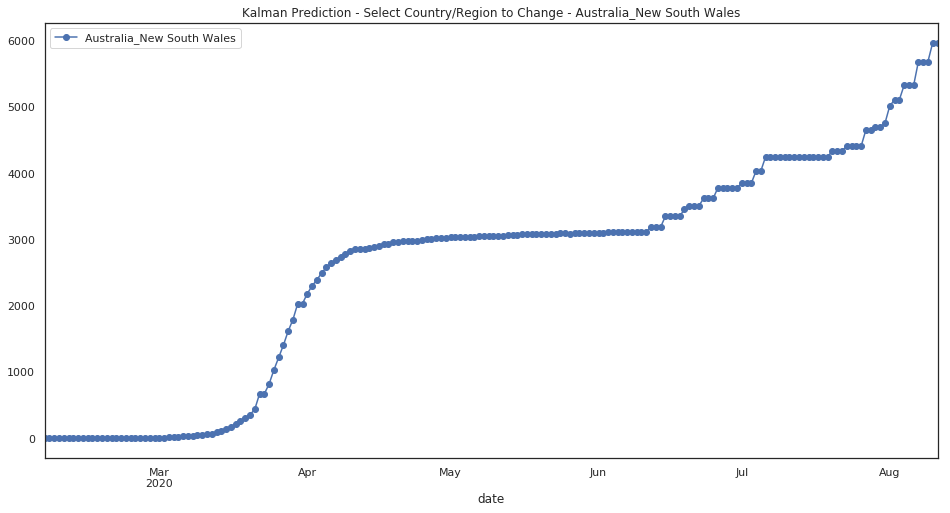

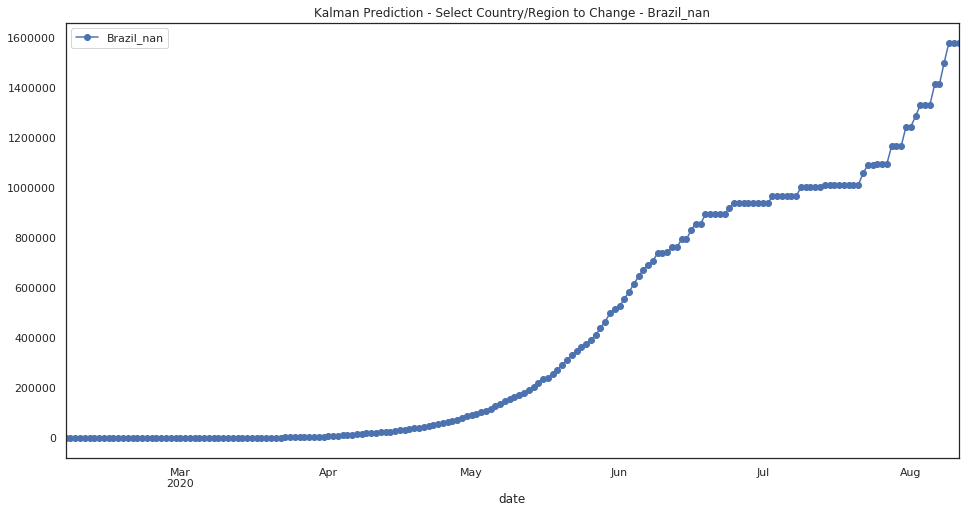

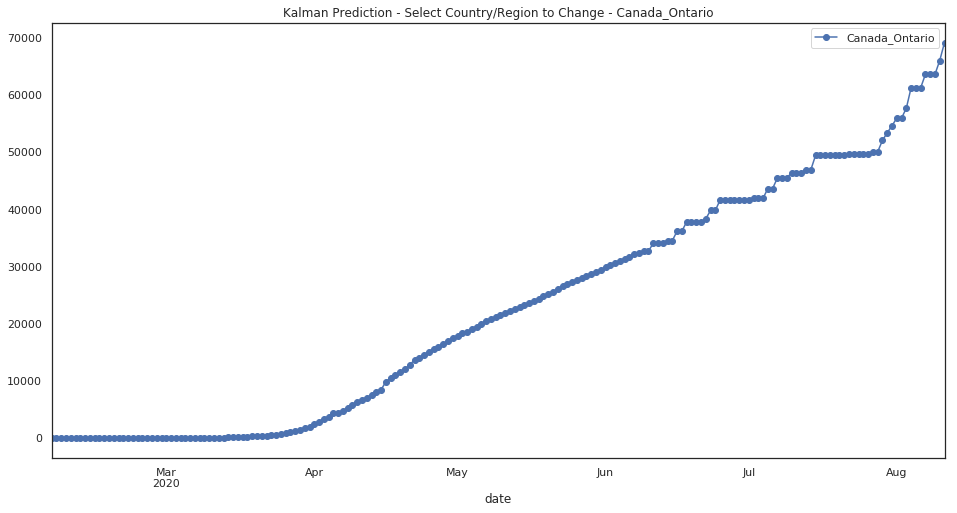

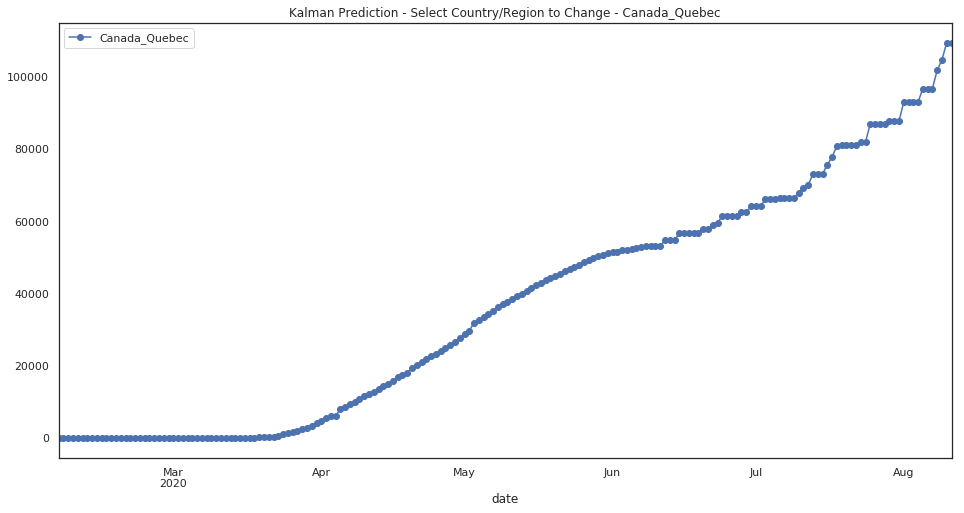

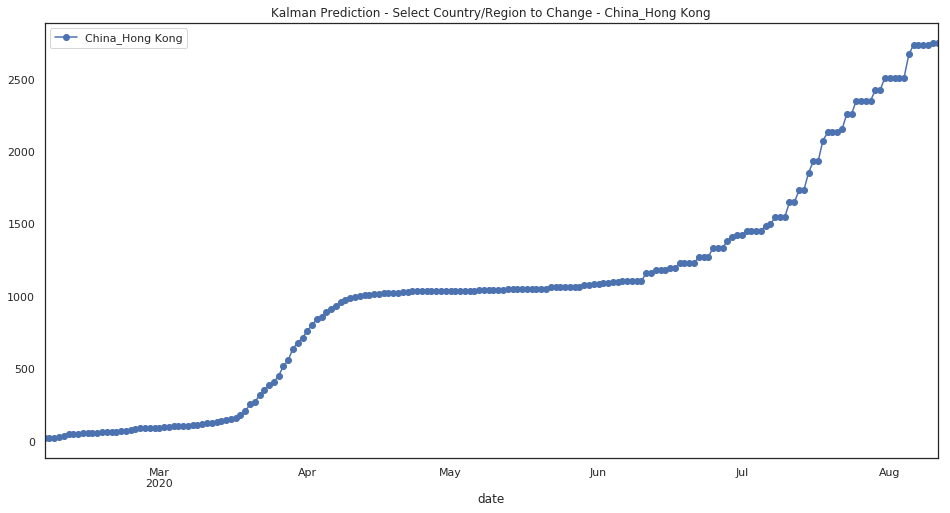

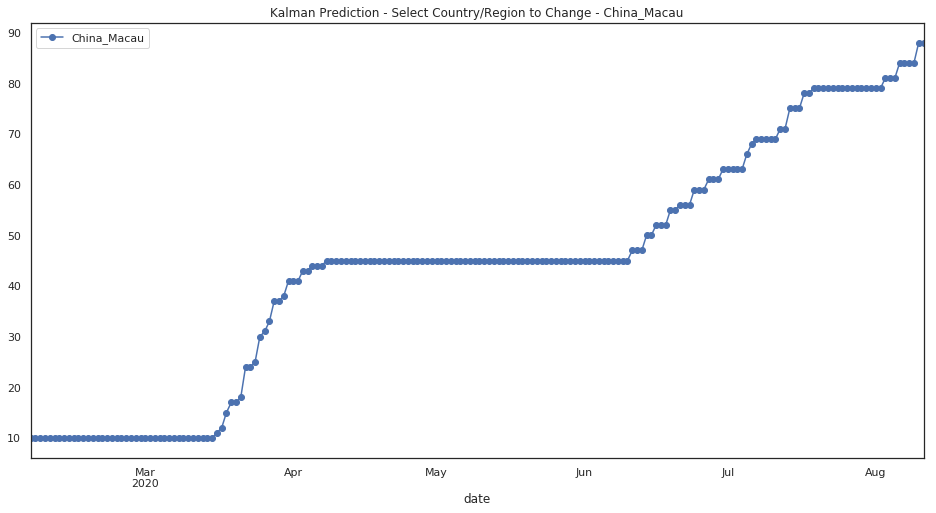

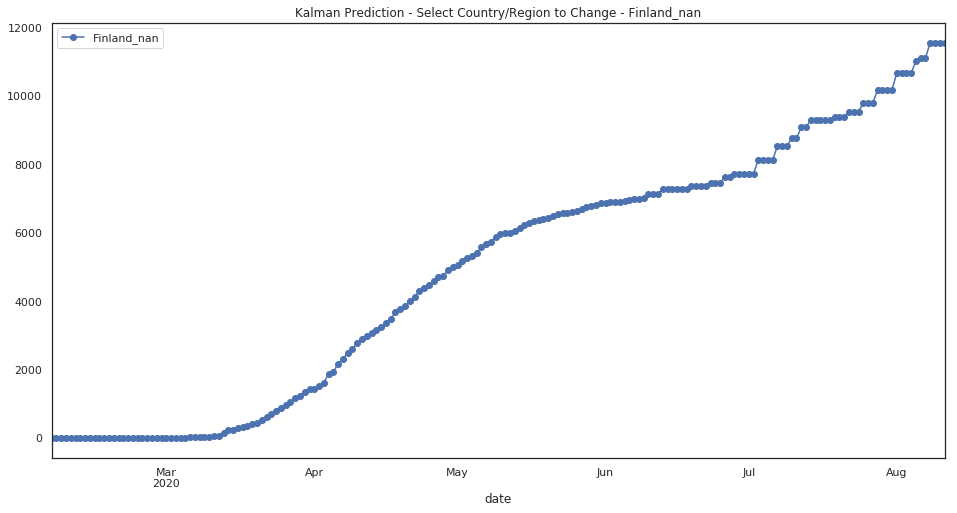

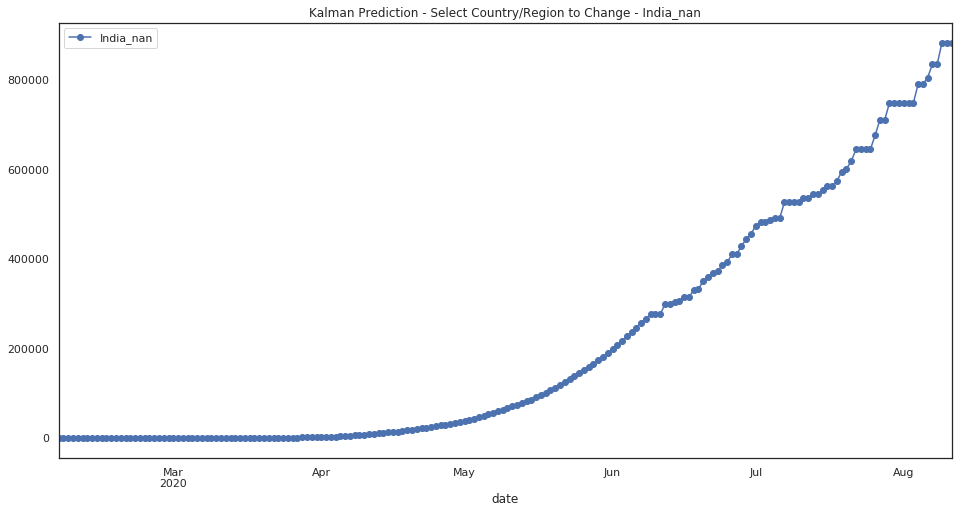

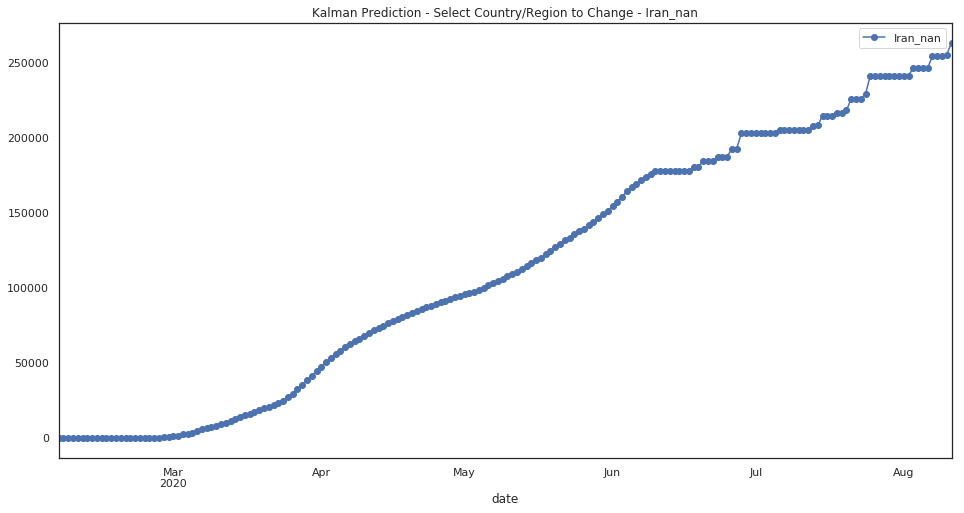

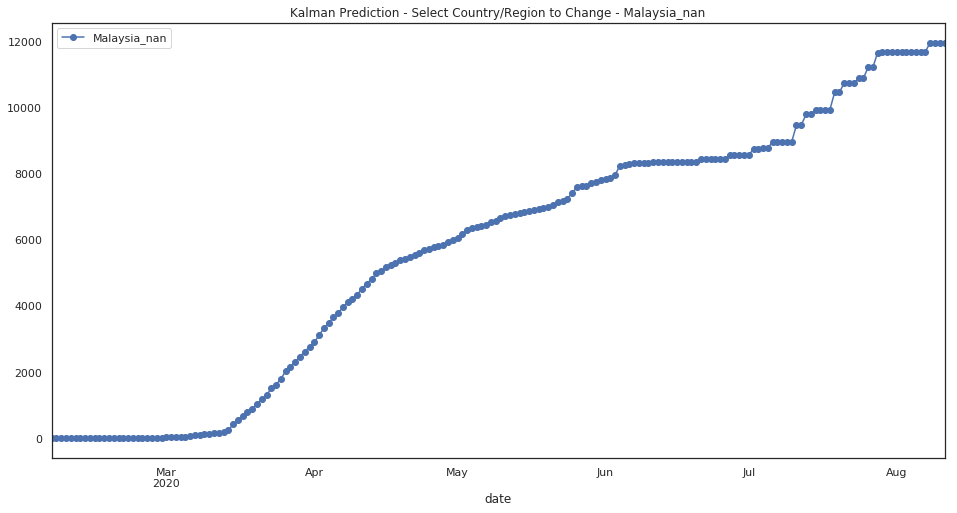

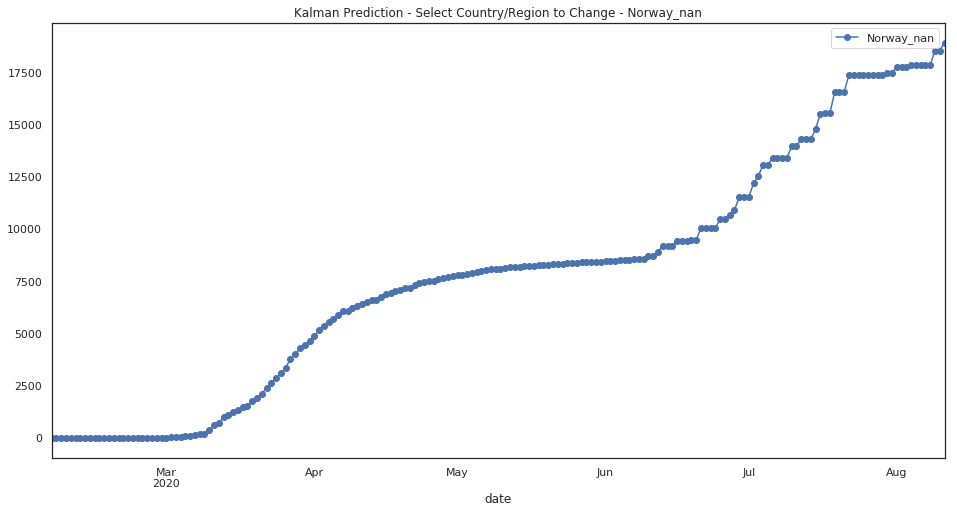

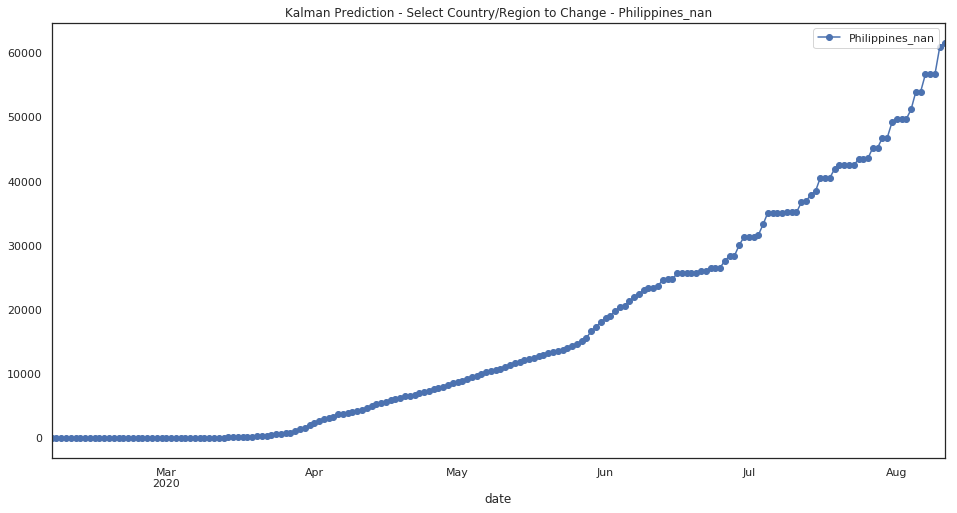

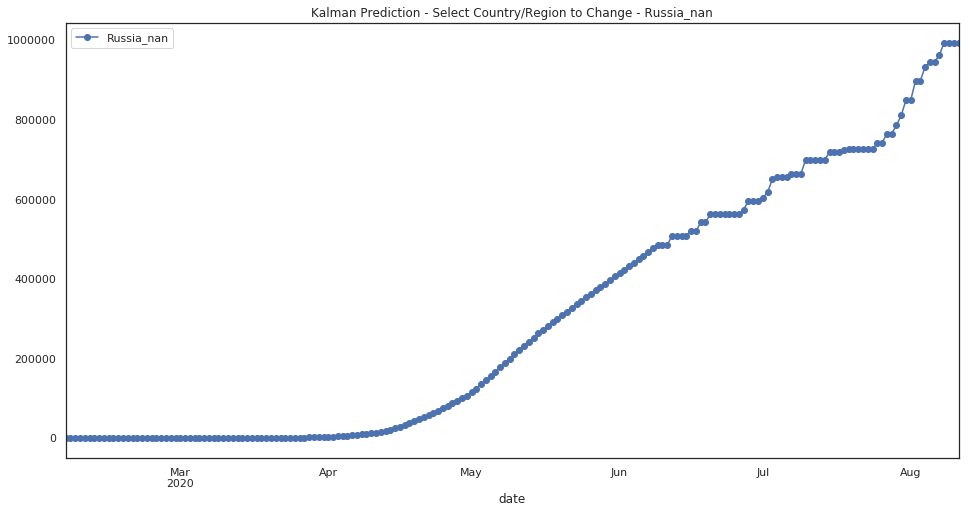

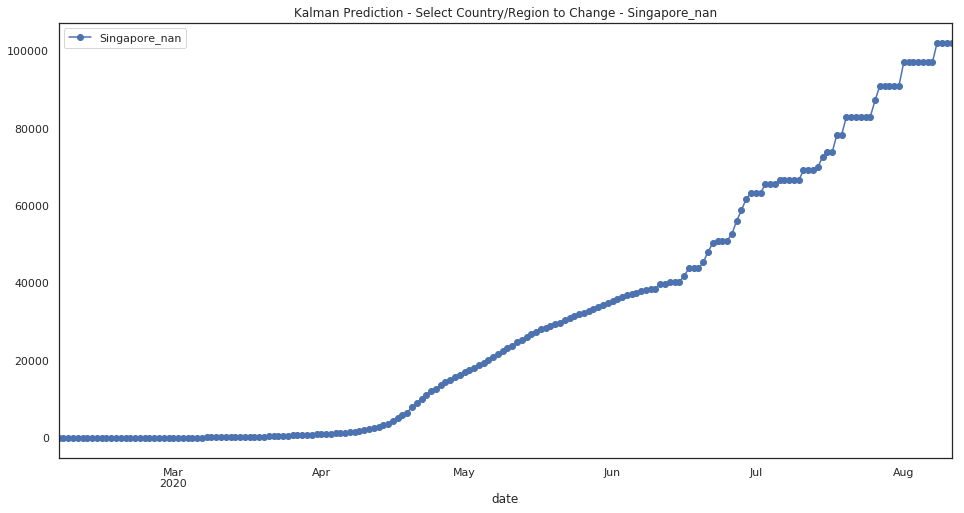

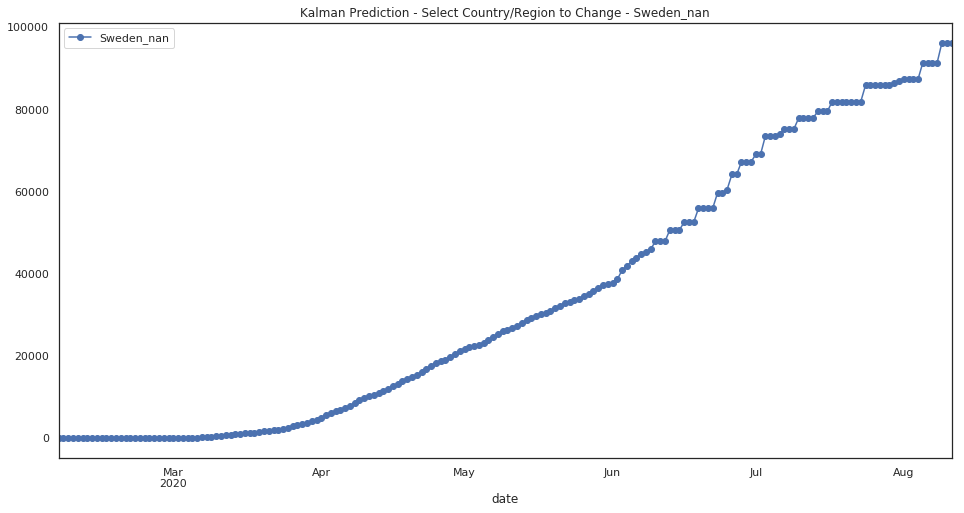

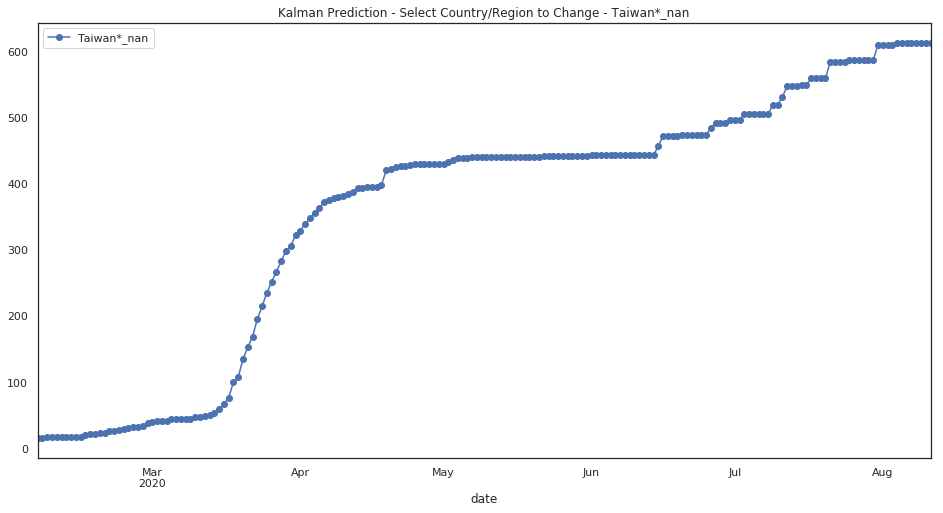

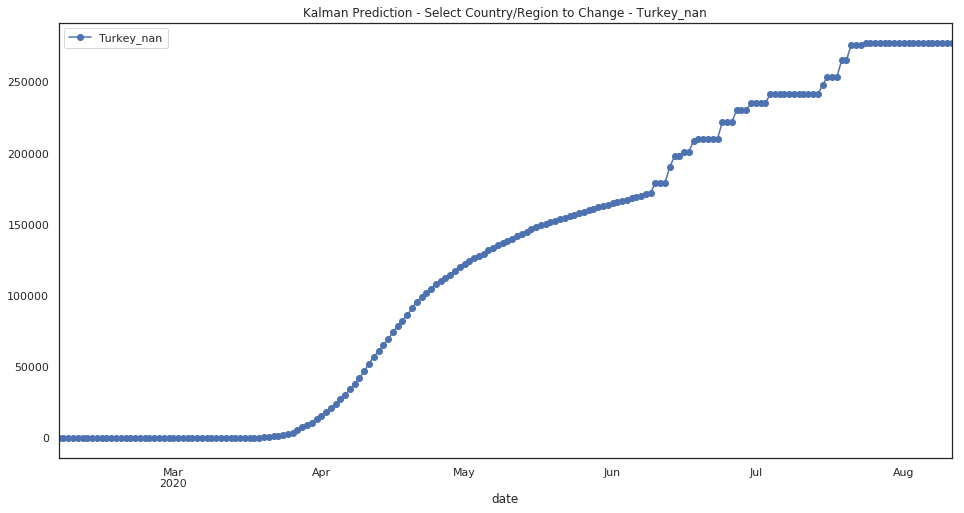

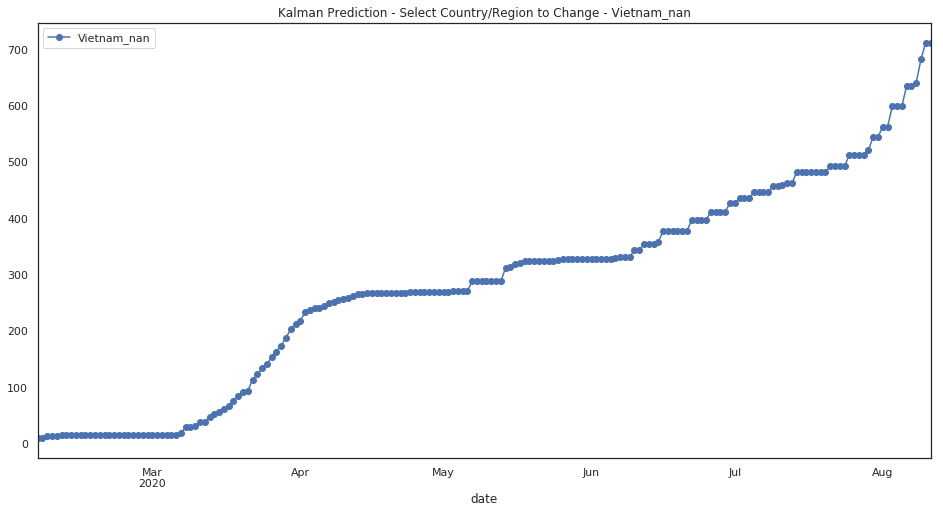

In [65]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [66]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-08-11 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN       3708581.0
Brazil_nan                                    NaN       1579882.0
Russia_nan                                    NaN        993397.0
India_nan                                     NaN        883065.0
Spain_nan                                     NaN        721485.0
Italy_nan                                     NaN        578874.0
United Kingdom_nan                            NaN        548054.0
Peru_nan                                      NaN        525790.0
Germany_nan                                   NaN        486643.0
France_nan                                    NaN        451323.0
Pakistan_nan                                  NaN        396307.0
Chile_nan                                     NaN        321625.0
Mexico_nan                                    NaN        295931.0
Turkey_nan                                    NaN        277662.0
Iran_nan                                      NaN        263503.0
Saudi Arabia_nan                              NaN        216507.0
Bangladesh_nan                                NaN        182138.0
China_Hubei                                   NaN        164250.0
Qatar_nan                                     NaN        126704.0
Belgium_nan                                   NaN        123362.0
Netherlands_nan                               NaN        116384.0
Colombia_nan                                  NaN        115400.0
Canada_Quebec                                 NaN        109416.0
Singapore_nan                                 NaN        102085.0
Poland_nan                                    NaN        101432.0
Ecuador_nan                                   NaN         97574.0
Belarus_nan                                   NaN         96414.0
Sweden_nan                                    NaN         96193.0
South Africa_nan                              NaN         86635.0
Egypt_nan                                     NaN         83569.0
...                                           ...             ...
Grenada_nan                                   NaN            48.0
Saint Kitts and Nevis_nan                     NaN            48.0
Saint Vincent and the Grenadines_nan          NaN            46.0
Australia_Northern Territory                  NaN            45.0
Laos_nan                                      NaN            41.0
China_Qinghai                                 NaN            41.0
Dominica_nan                                  NaN            40.0
Saint Lucia_nan                               NaN            40.0
Fiji_nan                                      NaN            38.0
United Kingdom_Falkland Islands (Malvinas)    NaN            37.0
United Kingdom_Turks and Caicos Islands       NaN            33.0
Denmark_Greenland                             NaN            31.0
France_New Caledonia                          NaN            28.0
Seychelles_nan                                NaN            24.0
United Kingdom_Montserrat                     NaN            20.0
Holy See_nan                                  NaN            19.0
Canada_Grand Princess                         NaN            19.0
Canada_Yukon                                  NaN            11.0
Western Sahara_nan                            NaN             9.0
MS Zaandam_nan                                NaN             9.0
Papua New Guinea_nan                          NaN             8.0
United Kingdom_British Virgin Islands         NaN             8.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN             7.0
France_Saint Barthelemy                       NaN             6.0
Canada_Northwest Territories                  NaN             5.0
Lesotho_nan                                   NaN             4.0
United Kingdom_Anguilla                       NaN             3.0
Canada_Diamond Princess                       NaN             1.0
China_Tibet                                   NaN             1.0
France_Saint Pierre an

In [67]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [68]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [69]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [70]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [71]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [72]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-06              6.0          6.0          6.0          6.0   
2020-02-07              6.0          6.0          6.0          6.0   
2020-02-08              6.0          6.0          6.0          6.0   
2020-02-09              6.0          6.0          6.0          6.0   
2020-02-10              6.0          6.0          6.0          6.0   
2020-02-11              6.0          6.0          6.0          6.0   
2020-02-12              6.0          6.0          6.0          6.0   
2020-02-13              6.0          6.0          6.0          6.0   
2020-02-14              6.0          6.0          6.0          6.0   
2020-02-15              6.0          6.0          6.0          6.0   
2020-02-16              6.0          6.0          6.0          6.0   
2020-02-17              6.0          6.0          6.0          6.0   
2020-02-18             54.0          6.0         51.0          6.0   
2020-02-19             27.0          6.0         55.0          6.0   
2020-02-20             47.0          6.0         53.0          6.0   
2020-02-21             57.0          6.0         59.0          6.0   
2020-02-22             46.0          6.0         56.0          6.0   
2020-02-23             43.0          6.0         49.0          6.0   
2020-02-24             51.0          6.0         65.0          6.0   
2020-02-25             54.0          6.0         50.0          6.0   
2020-02-26             21.0          6.0         56.0          6.0   
2020-02-27             54.0          6.0         66.0          6.0   
2020-02-28             27.0          6.0         44.0          6.0   
2020-02-29             29.0          6.0         50.0          6.0   
2020-03-01             32.0          6.0         46.0          6.0   
2020-03-02             35.0          6.0         46.0          6.0   
2020-03-03             35.0          6.0         39.0          8.0   
2020-03-04             28.0          6.0         66.0          1.0   
2020-03-05             28.0          6.0        107.0          1.0   
2020-03-06             29.0          6.0         91.0          4.0   
...                     ...          ...          ...          ...   
2020-07-14          27379.0       2384.0      18492.0       1308.0   
2020-07-15          28938.0       2326.0      19143.0       1308.0   
2020-07-16          28099.0       2485.0      18743.0       1382.0   
2020-07-17          28100.0       2426.0      18744.0       1366.0   
2020-07-18          28888.0       2419.0      18778.0       1385.0   
2020-07-19          31588.0       2419.0      18917.0       1385.0   
2020-07-20          31404.0       2421.0      19558.0       1448.0   
2020-07-21          30752.0       2475.0      20032.0       1439.0   
2020-07-22          30792.0       2684.0      20126.0       1439.0   
2020-07-23          30881.0       2674.0      19877.0       1453.0   
2020-07-24          30999.0       2657.0      19911.0       1453.0   
2020-07-25          31280.0       2663.0      19936.0       1453.0   
2020-07-26          31861.0       2711.0      19938.0       1494.0   
2020-07-27          31459.0       2885.0      20228.0       1494.0   
2020-07-28          31939.0       2815.0      21375.0       1494.0   
2020-07-29          33536.0       2923.0      21412.0       1494.0   
2020-07-30          32605.0       2874.0      21273.0       1581.0   
2020-07-31          32606.0       2874.0      22073.0       1621.0   
2020-08-01          32688.0       2874.0      22029.0       1611.0   
2020-08-02          32686.0       2874.0      23368.0       1611.0   
2020-08-03          32687.0       2874.0      23184.0       1676.0   
2020-08-04          33243.0       2874.0      23312.0       1668.0   
2020-08-05          35069.0       2874.0      23675.0       1668.0   
2020-08-06          34261.0       2874.0      25415.0       1668.0   
2020-08-07

In [73]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
pred=pred[:-1]

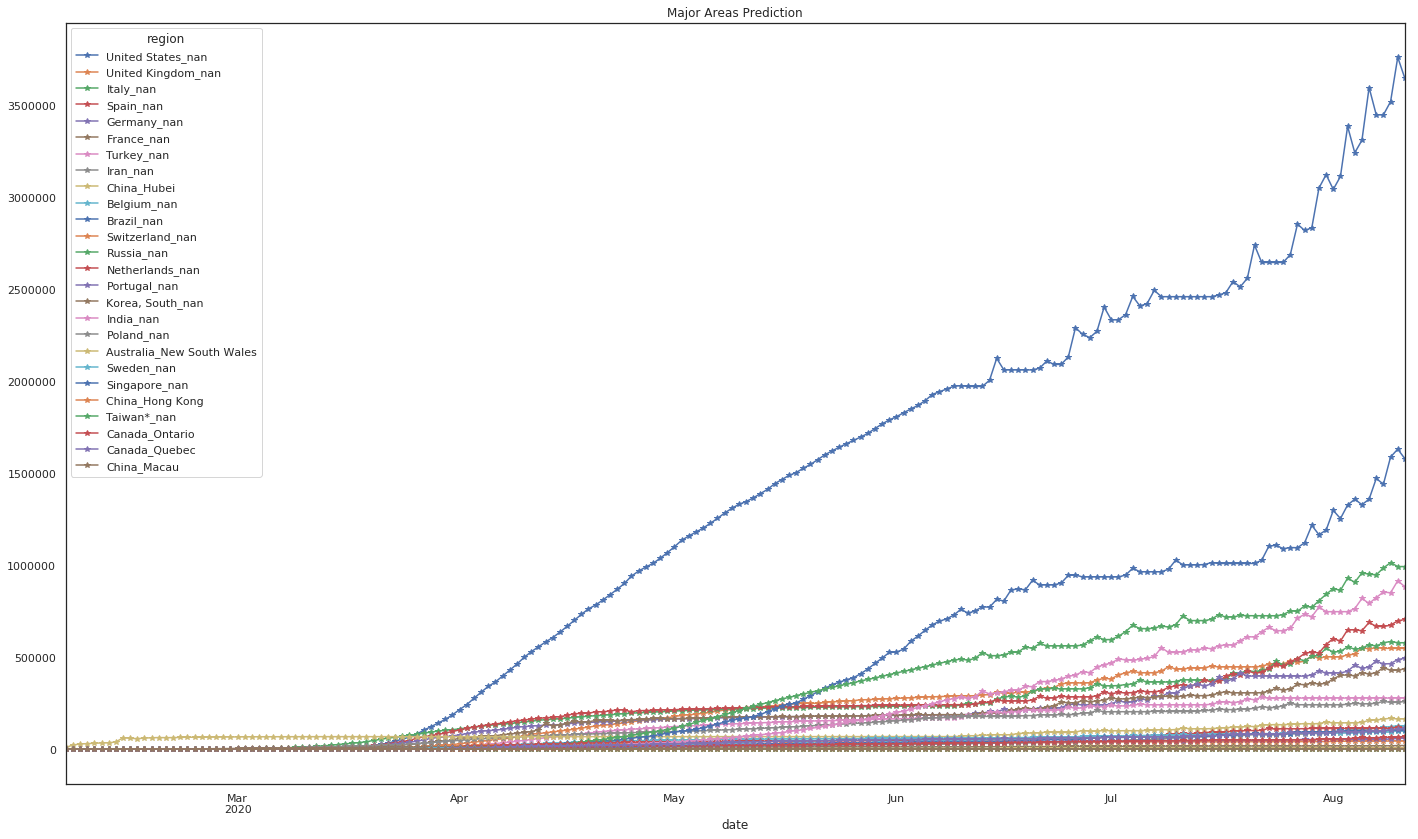

In [74]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',
        'Germany_nan',
        'France_nan',
        'Turkey_nan',
        'Iran_nan',
        'China_Hubei',
        'Belgium_nan',
        'Brazil_nan',
        'Switzerland_nan',
        'Russia_nan',
        'Netherlands_nan',
        'Portugal_nan',
        'Korea, South_nan',
        'India_nan',
        'Poland_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Canada_Ontario',
        'Canada_Quebec',
        'China_Macau'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p[:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

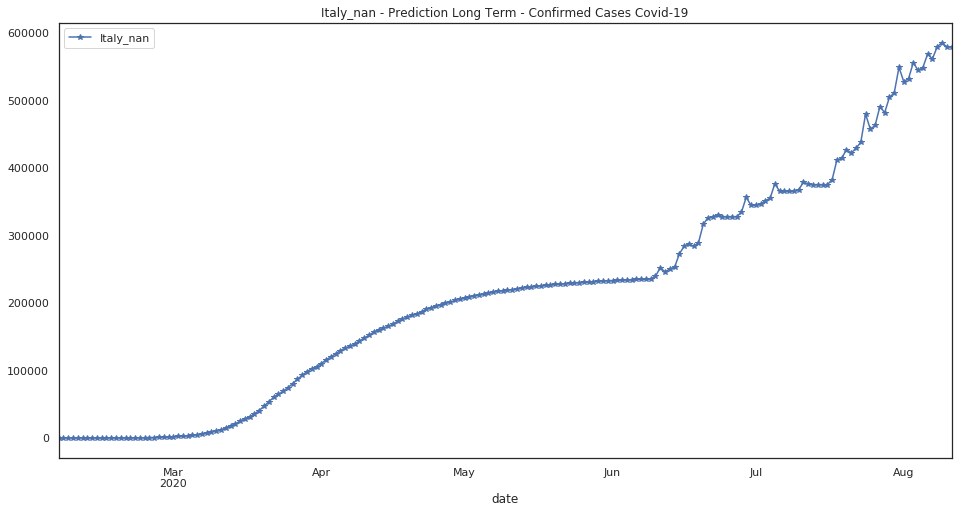

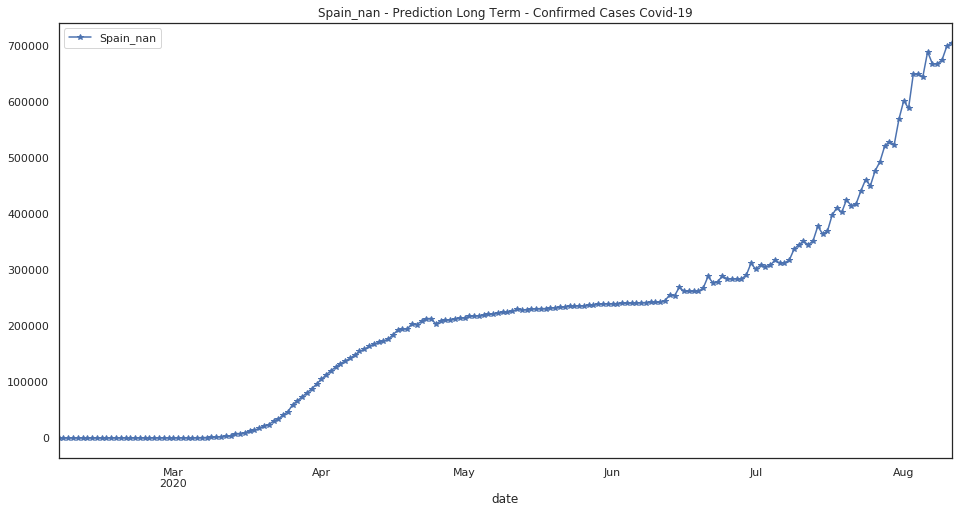

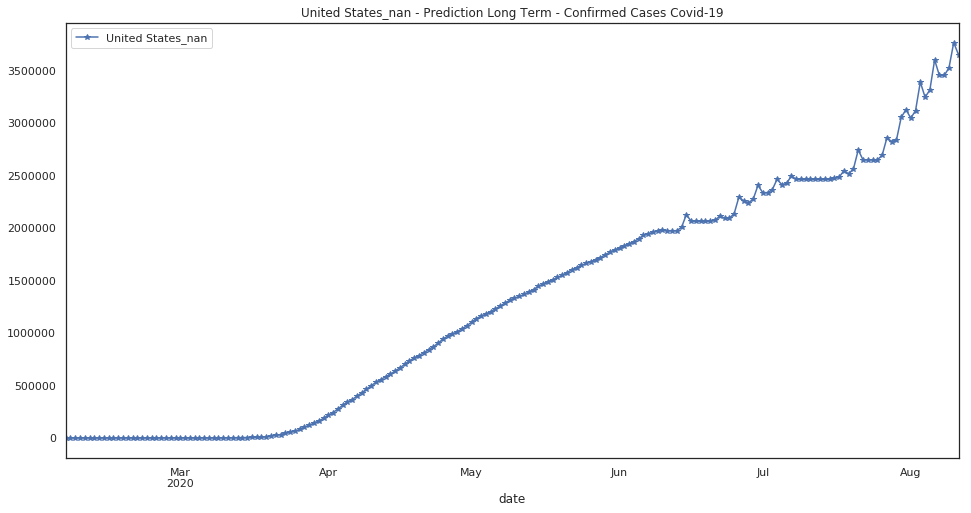

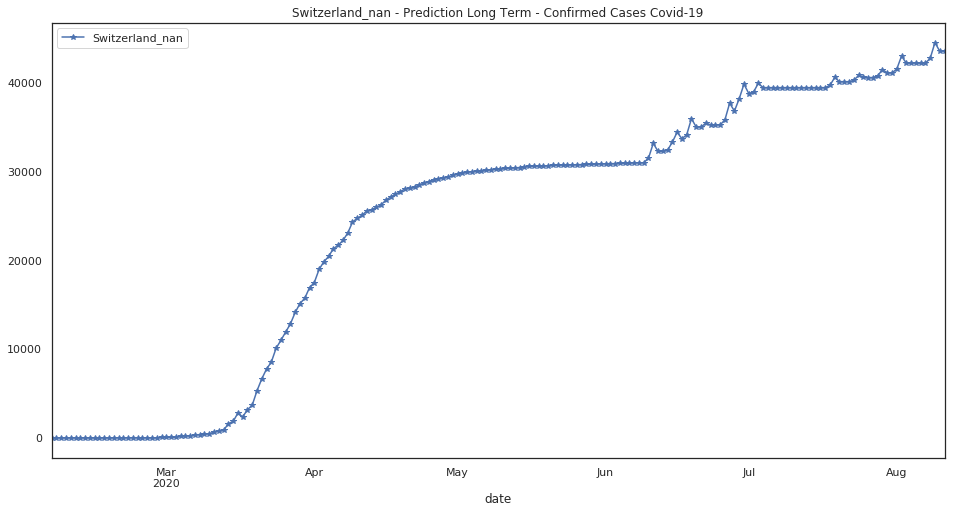

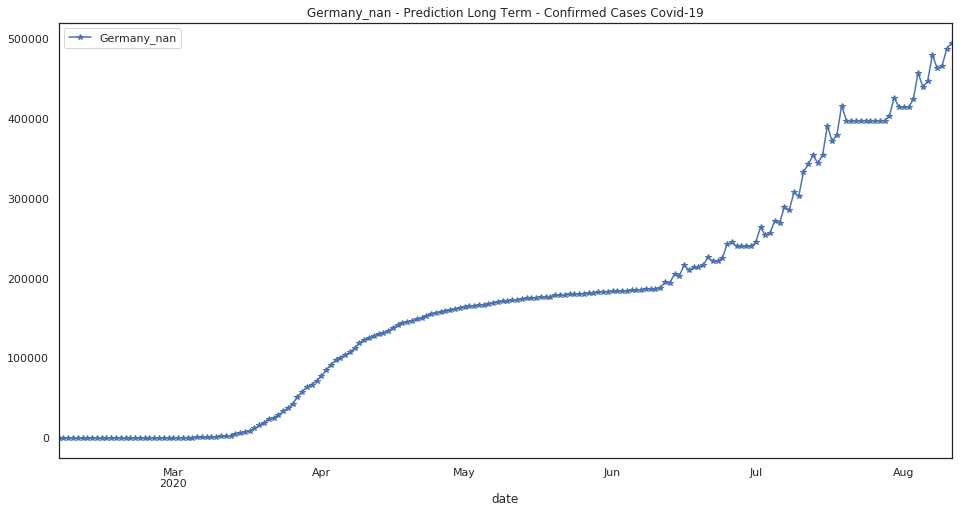

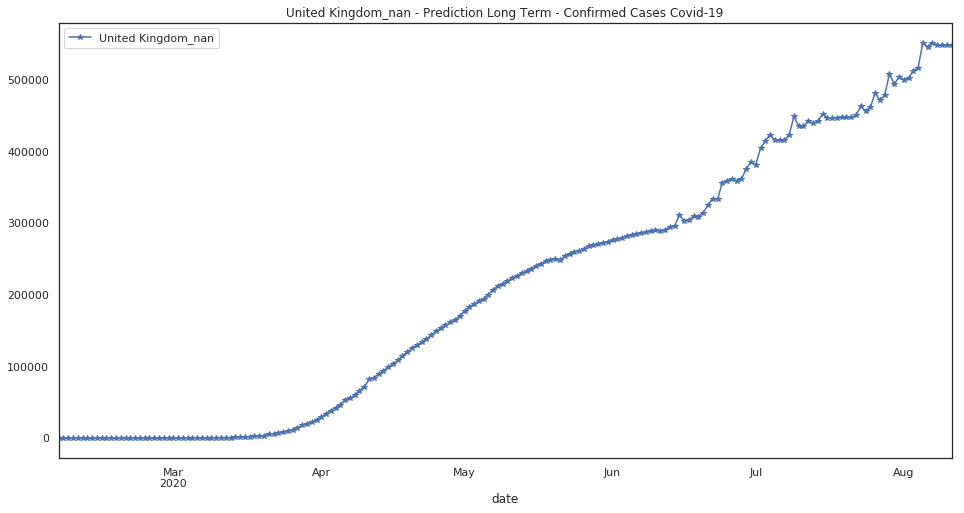

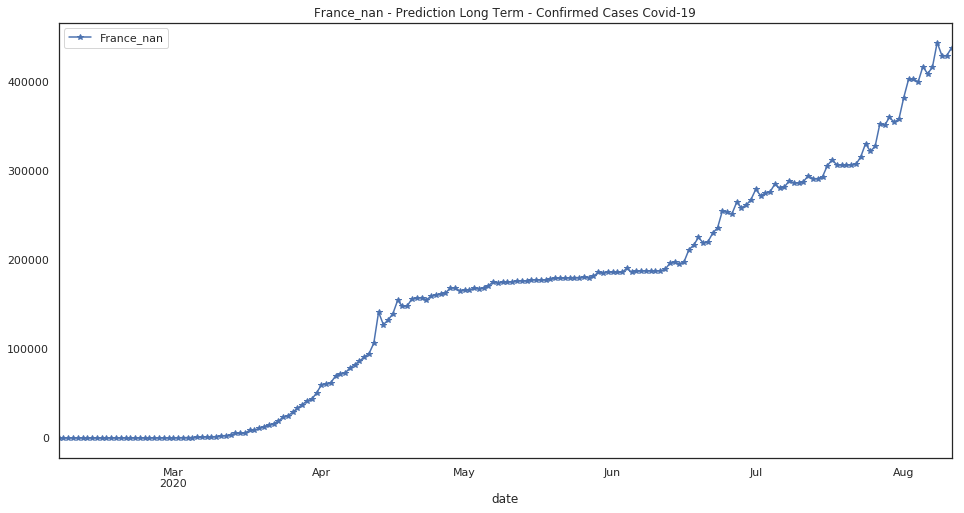

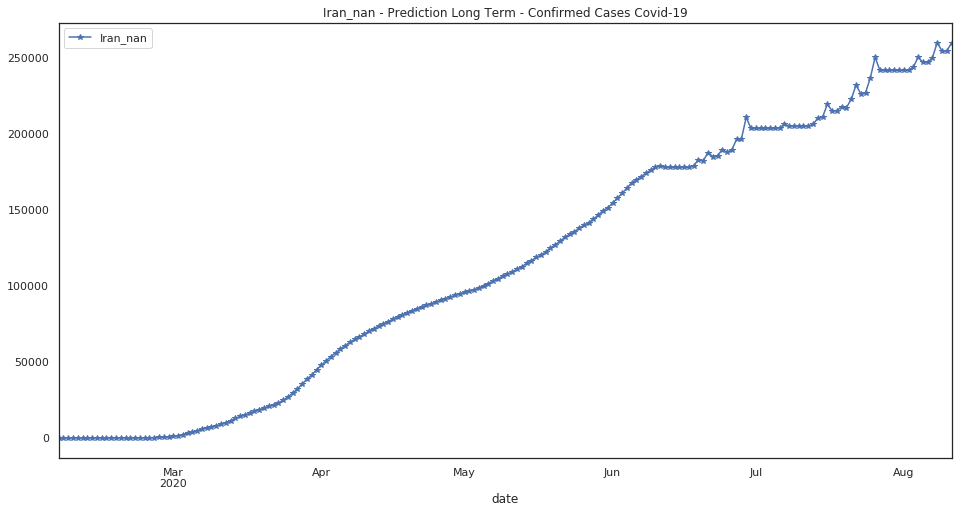

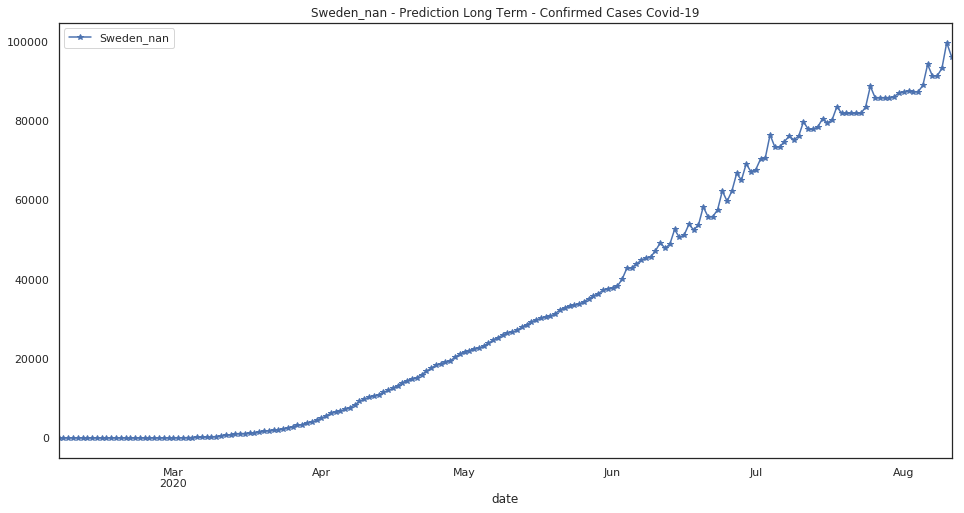

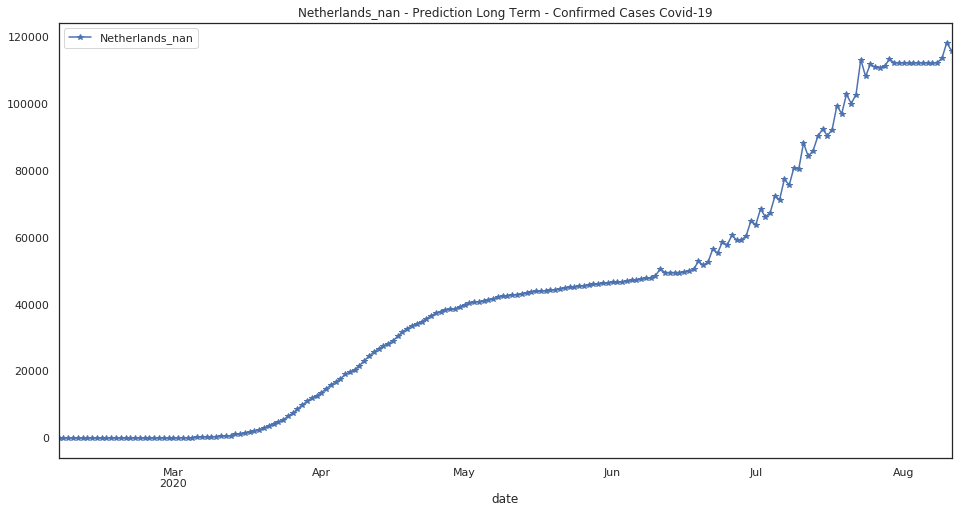

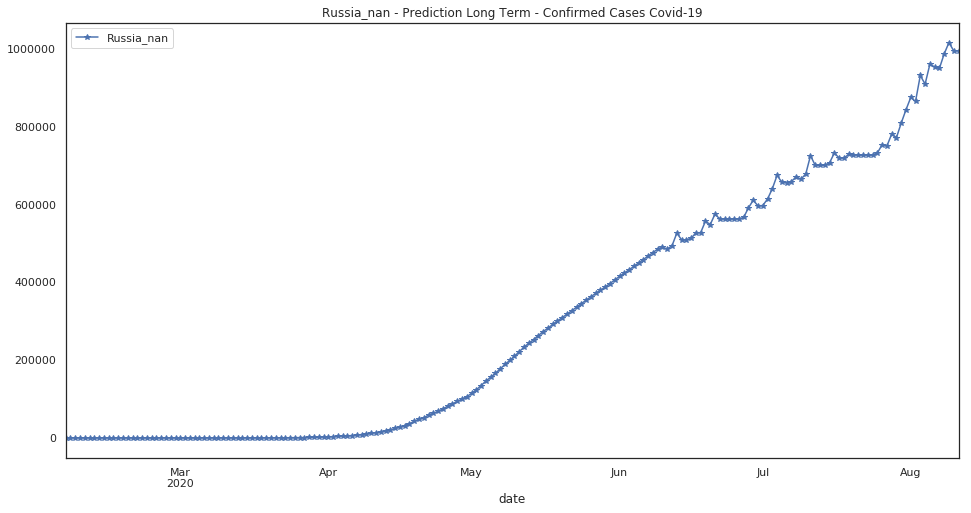

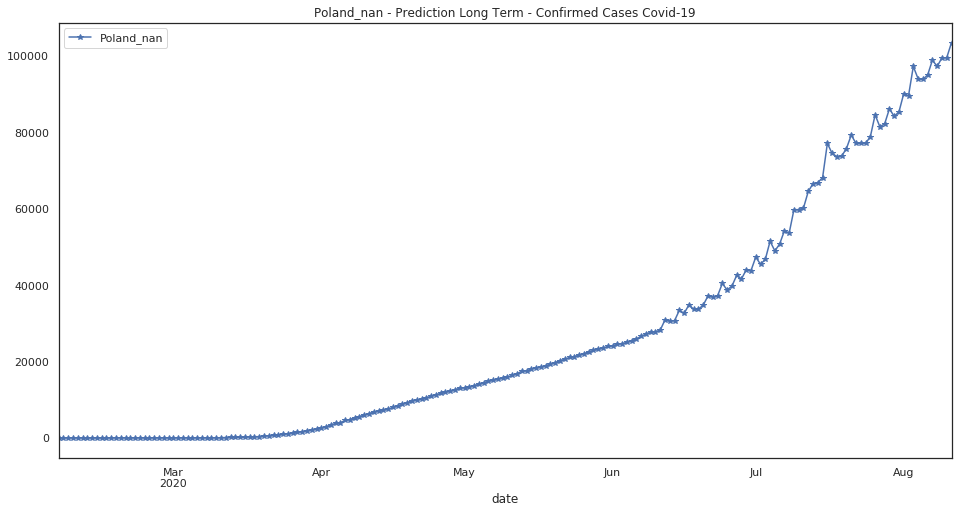

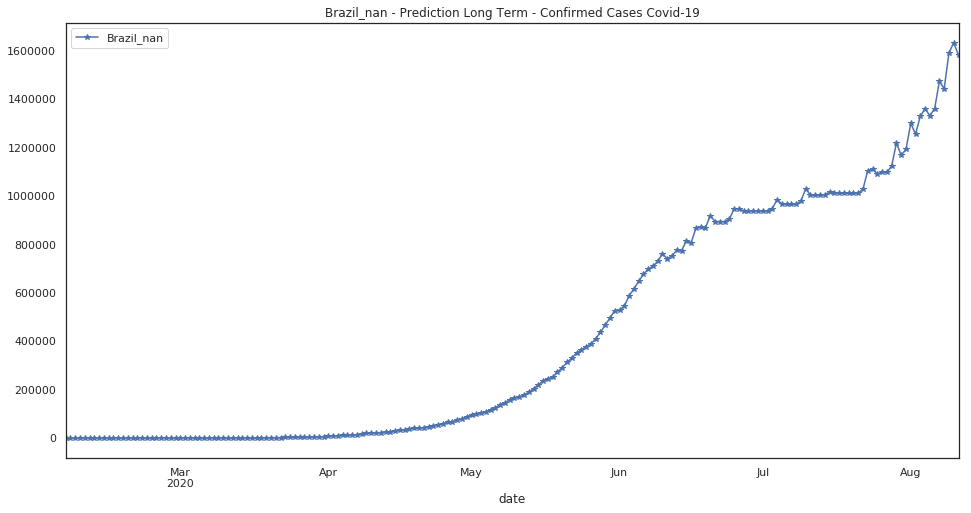

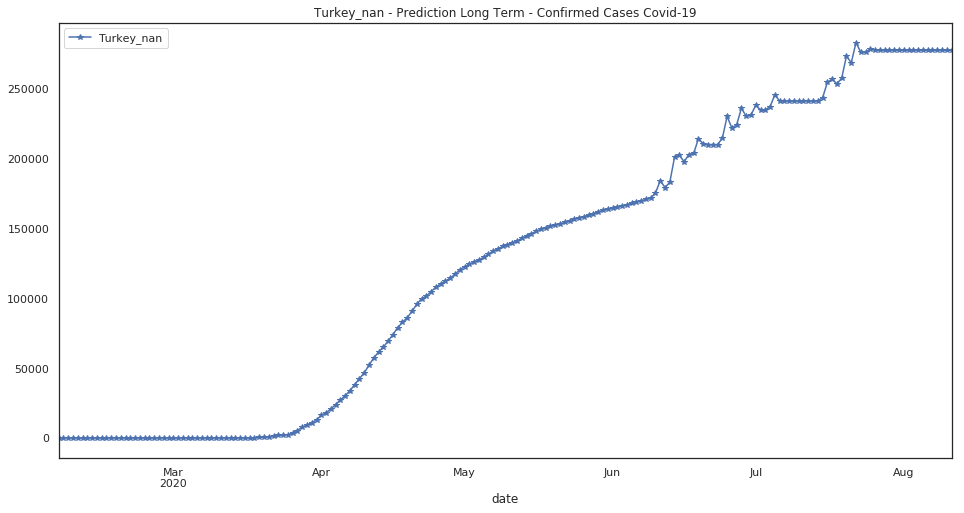

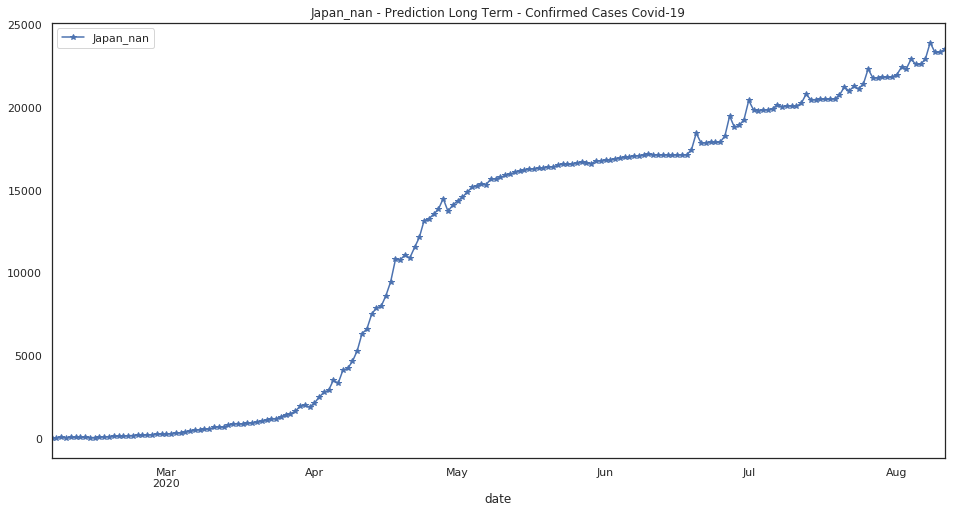

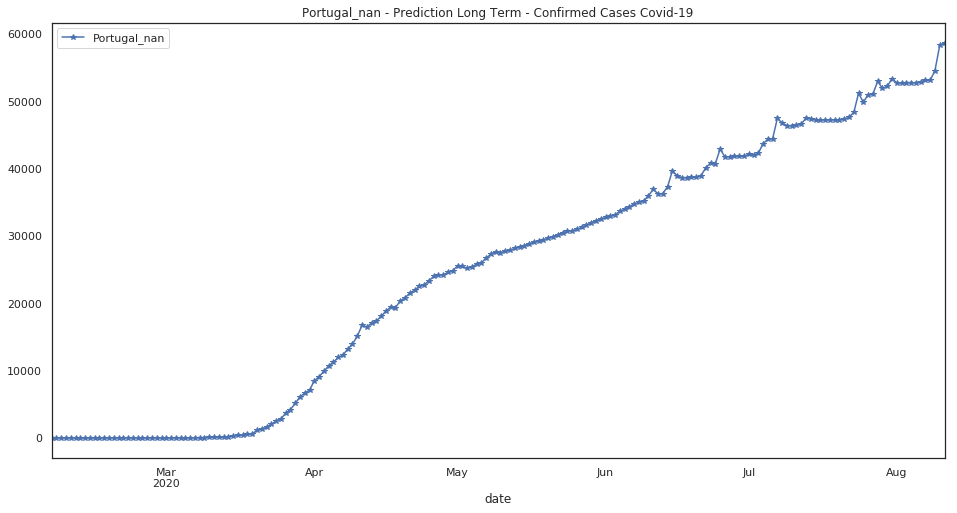

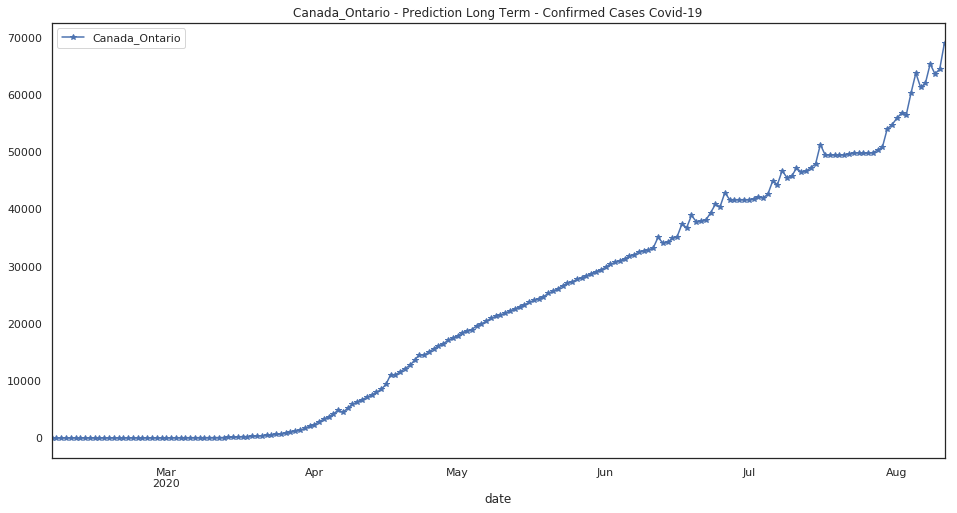

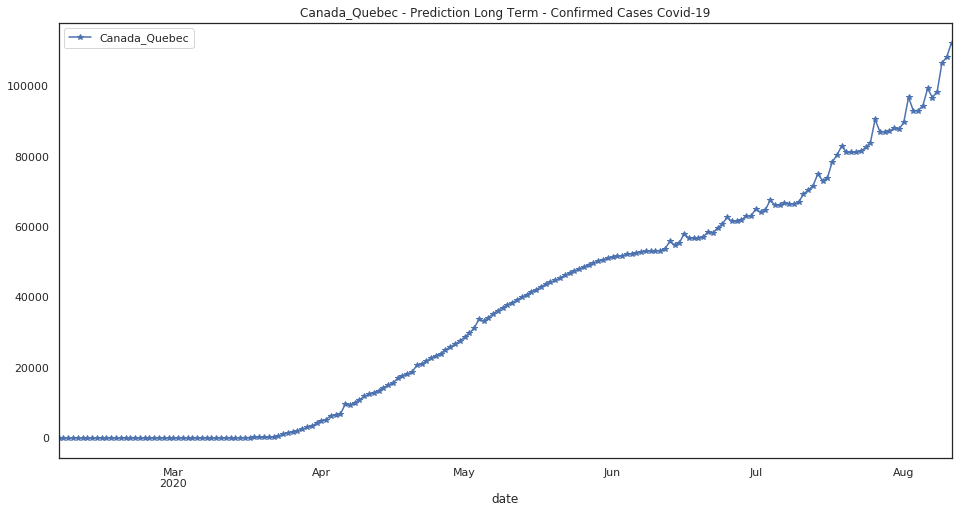

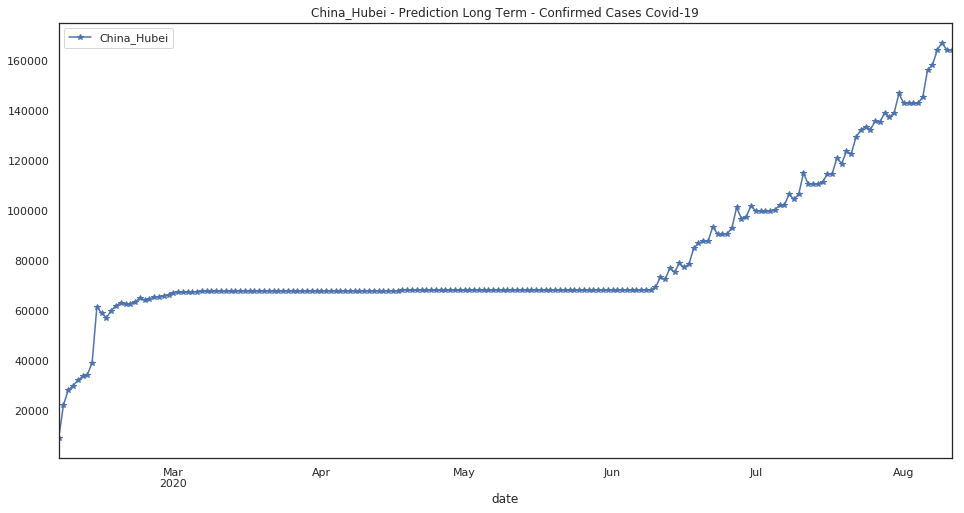

In [75]:
#
rgsx=['Italy_nan','Spain_nan','United States_nan','Switzerland_nan',
      'Germany_nan','United Kingdom_nan','France_nan','Iran_nan',
      'Sweden_nan','Netherlands_nan','Russia_nan','Poland_nan',
      'Brazil_nan','Turkey_nan','Japan_nan',
      'Portugal_nan','Canada_Ontario','Canada_Quebec','China_Hubei']
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

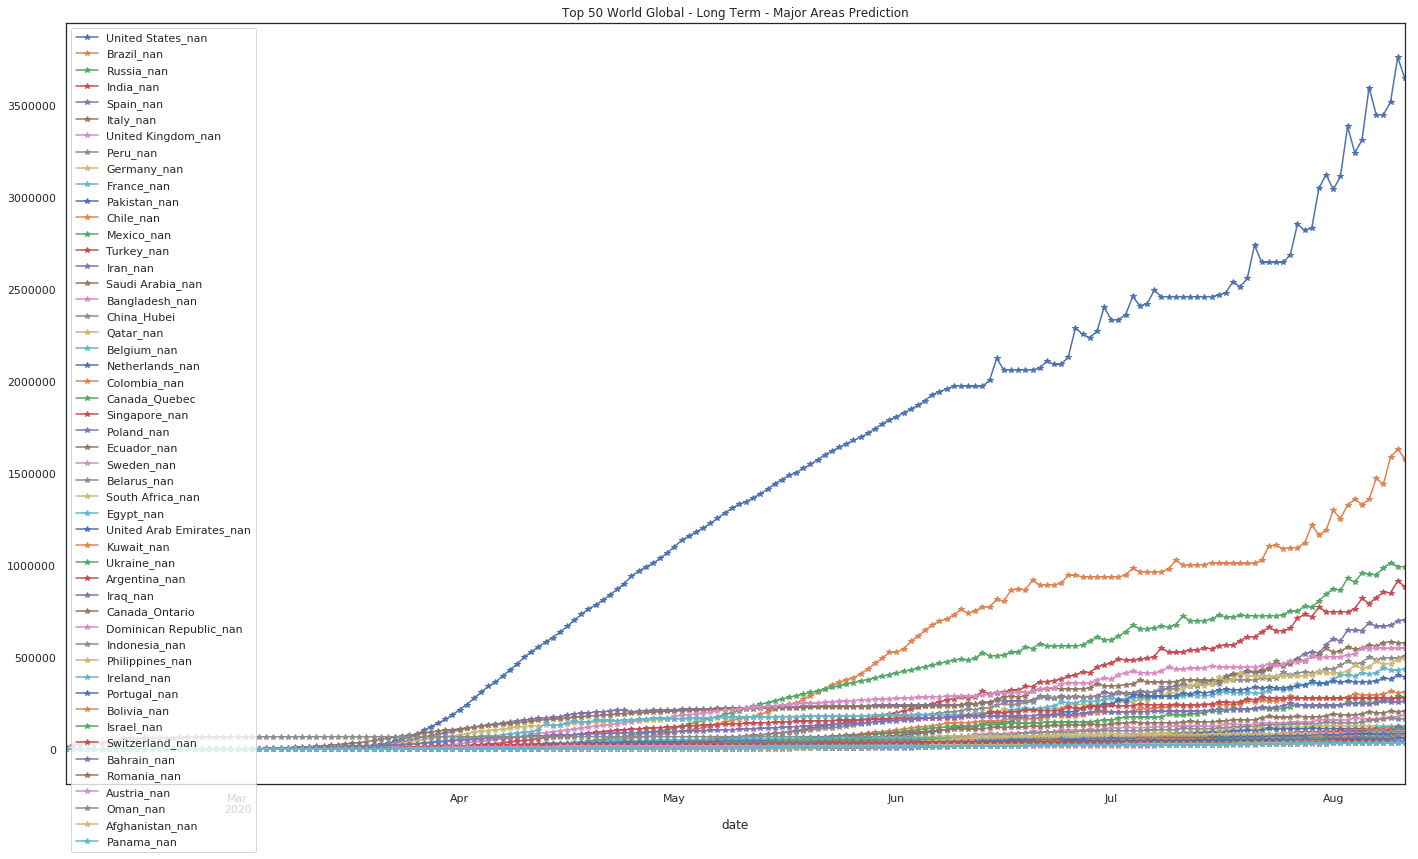

In [76]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

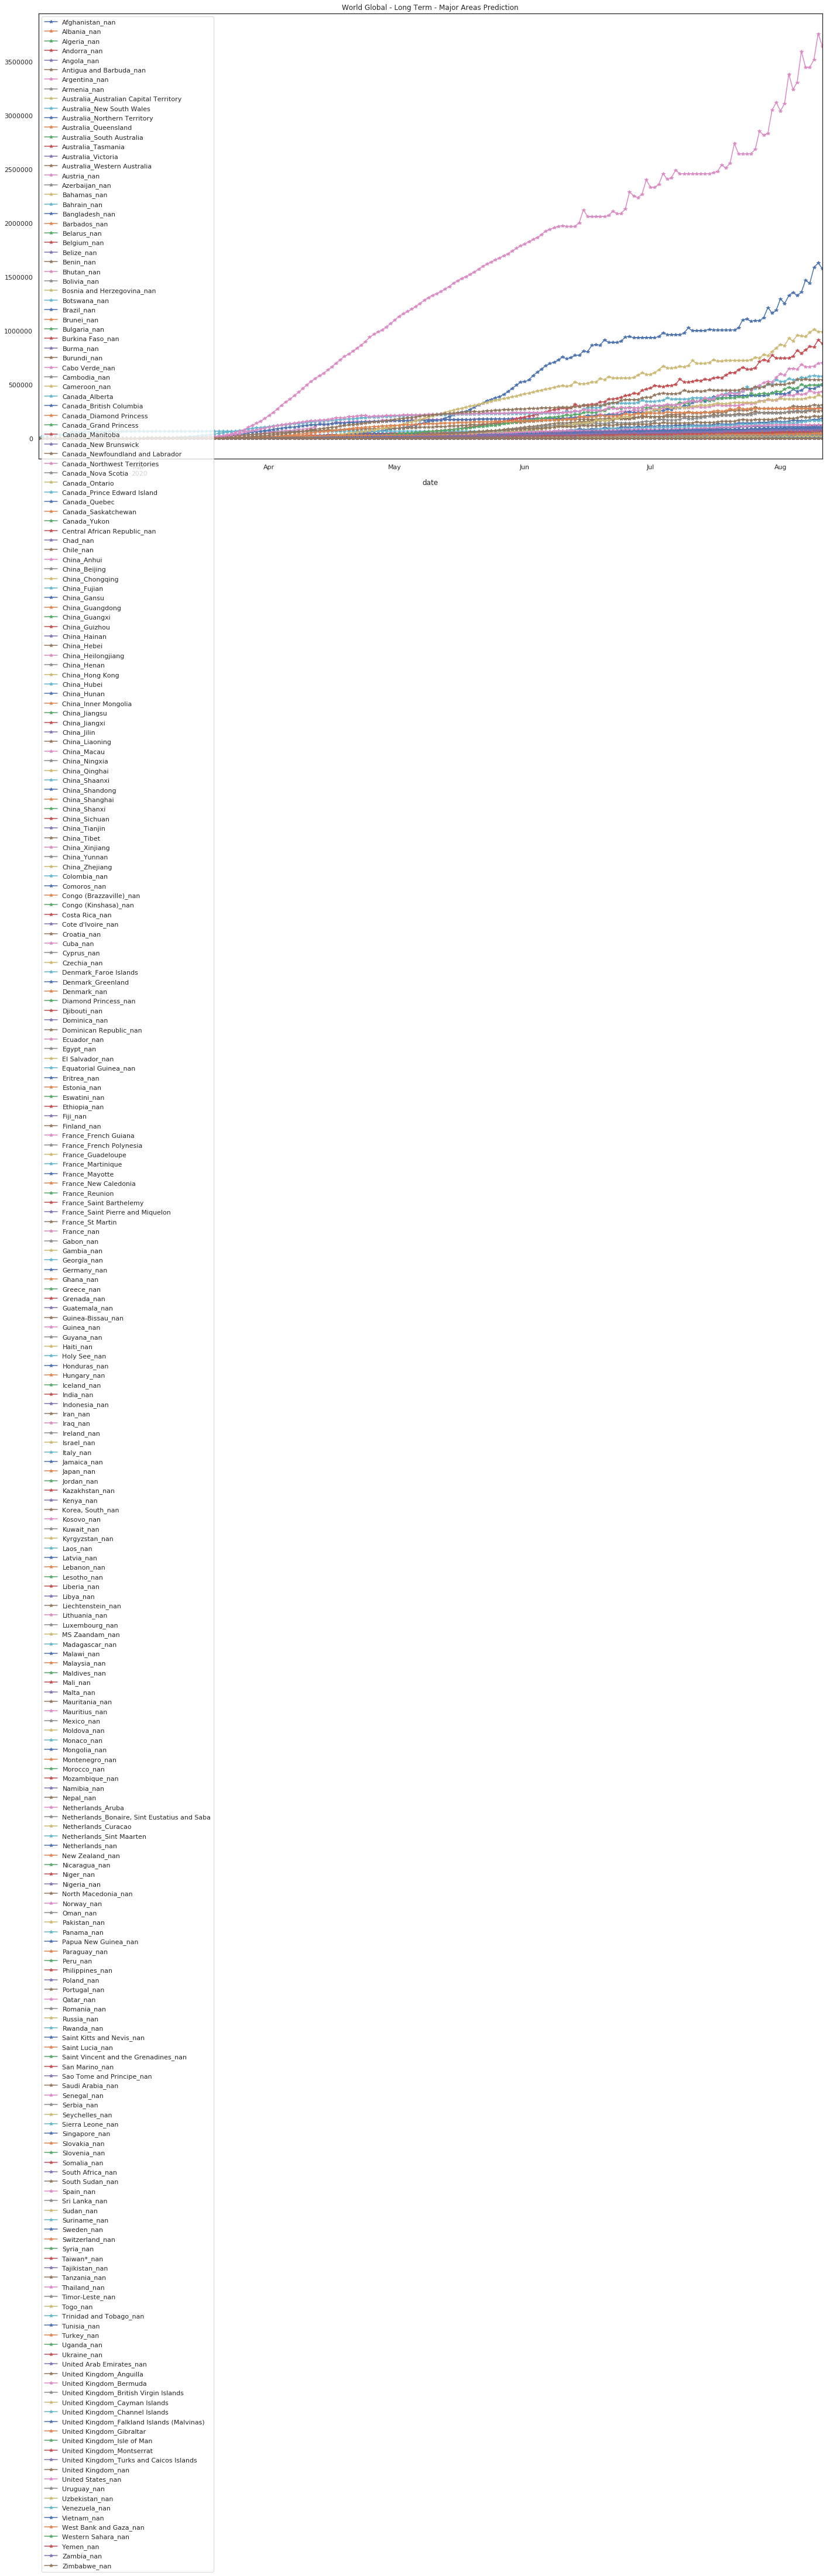

In [77]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [78]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [79]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-03-22             73.0         91.0        251.0        221.0   
2020-03-23             94.0        110.0        310.0        282.0   
2020-03-24             98.0        128.0        316.0        244.0   
2020-03-25            148.0        151.0        356.0        200.0   
2020-03-26            142.0        179.0        408.0        223.0   
2020-03-27            156.0        204.0        484.0        269.0   
2020-03-28            169.0        204.0        510.0        314.0   
2020-03-29            162.0        216.0        560.0        346.0   
2020-03-30            194.0        233.0        633.0        363.0   
2020-03-31            256.0        244.0        741.0        394.0   
2020-04-01            247.0        268.0        914.0        381.0   
2020-04-02            343.0        282.0       1044.0        411.0   
2020-04-03            348.0        304.0       1204.0        455.0   
2020-04-04            338.0        339.0       1381.0        451.0   
2020-04-05            379.0        368.0       1378.0        492.0   
2020-04-06            441.0        390.0       1457.0        528.0   
2020-04-07            448.0        393.0       1569.0        540.0   
2020-04-08            519.0        397.0       1593.0        557.0   
2020-04-09            521.0        420.0       1738.0        575.0   
2020-04-10            574.0        422.0       1824.0        594.0   
2020-04-11            609.0        431.0       1904.0        603.0   
2020-04-12            648.0        454.0       1956.0        605.0   
2020-04-13            716.0        467.0       2058.0        657.0   
2020-04-14            774.0        488.0       2120.0        646.0   
2020-04-15            824.0        491.0       2222.0        661.0   
2020-04-16            904.0        520.0       2322.0        673.0   
2020-04-17            954.0        547.0       2459.0        673.0   
2020-04-18           1011.0        560.0       2625.0        704.0   
2020-04-19           1025.0        562.0       2704.0        704.0   
2020-04-20           1103.0        583.0       2782.0        713.0   
...                     ...          ...          ...          ...   
2020-07-13          27938.0       2208.0      18275.0       1341.0   
2020-07-14          27379.0       2384.0      18492.0       1308.0   
2020-07-15          28938.0       2326.0      19143.0       1308.0   
2020-07-16          28099.0       2485.0      18743.0       1382.0   
2020-07-17          28100.0       2426.0      18744.0       1366.0   
2020-07-18          28888.0       2419.0      18778.0       1385.0   
2020-07-19          31588.0       2419.0      18917.0       1385.0   
2020-07-20          31404.0       2421.0      19558.0       1448.0   
2020-07-21          30752.0       2475.0      20032.0       1439.0   
2020-07-22          30792.0       2684.0      20126.0       1439.0   
2020-07-23          30881.0       2674.0      19877.0       1453.0   
2020-07-24          30999.0       2657.0      19911.0       1453.0   
2020-07-25          31280.0       2663.0      19936.0       1453.0   
2020-07-26          31861.0       2711.0      19938.0       1494.0   
2020-07-27          31459.0       2885.0      20228.0       1494.0   
2020-07-28          31939.0       2815.0      21375.0       1494.0   
2020-07-29          33536.0       2923.0      21412.0       1494.0   
2020-07-30          32605.0       2874.0      21273.0       1581.0   
2020-07-31          32606.0       2874.0      22073.0       1621.0   
2020-08-01          32688.0       2874.0      22029.0       1611.0   
2020-08-02          32686.0       2874.0      23368.0       1611.0   
2020-08-03          32687.0       2874.0      23184.0       1676.0   
2020-08-04          33243.0       2874.0      23312.0       1668.0   
2020-08-05          35069.0       2874.0      23675.0       1668.0   
2020-08-06

In [80]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [81]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [82]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [83]:
heatmap_m[:]

region        Lat        Long  \
0                                 Afghanistan_nan  33.000000   65.000000   
1                                     Albania_nan  41.153300   20.168300   
2                                     Algeria_nan  28.033900    1.659600   
3                                     Andorra_nan  42.506300    1.521800   
4                                      Angola_nan -11.202700   17.873900   
5                         Antigua and Barbuda_nan  17.060800  -61.796400   
6                                   Argentina_nan -38.416100  -63.616700   
7                                     Armenia_nan  40.069100   45.038200   
8          Australia_Australian Capital Territory -35.473500  149.012400   
9                       Australia_New South Wales -33.868800  151.209300   
10                   Australia_Northern Territory -12.463400  130.845600   
11                           Australia_Queensland -28.016700  153.400000   
12                      Australia_South Australia -34.928500  138.600700   
13                             Australia_Tasmania -41.454500  145.970700   
14                             Australia_Victoria -37.813600  144.963100   
15                    Australia_Western Australia -31.950500  115.860500   
16                                    Austria_nan  47.516200   14.550100   
17                                 Azerbaijan_nan  40.143100   47.576900   
18                                    Bahamas_nan  25.034300  -77.396300   
19                                    Bahrain_nan  26.027500   50.550000   
20                                 Bangladesh_nan  23.685000   90.356300   
21                                   Barbados_nan  13.193900  -59.543200   
22                                    Belarus_nan  53.709800   27.953400   
23                                    Belgium_nan  50.833300    4.000000   
24                                      Benin_nan   9.307700    2.315800   
25                                     Bhutan_nan  27.514200   90.433600   
26                                    Bolivia_nan -16.290200  -63.588700   
27                     Bosnia and Herzegovina_nan  43.915900   17.679100   
28                                     Brazil_nan -14.235000  -51.925300   
29                                     Brunei_nan   4.535300  114.727700   
..                                            ...        ...         ...   
238                               Timor-Leste_nan  -8.874217  125.727539   
239                                    Belize_nan  13.193900  -59.543200   
240                                      Laos_nan  19.856270  102.495496   
241                                     Libya_nan  26.335100   17.228331   
242                        West Bank and Gaza_nan  31.952200   35.233200   
243                             Guinea-Bissau_nan  11.803700  -15.180400   
244                                      Mali_nan  17.570692   -3.996166   
245                     Saint Kitts and Nevis_nan  17.357822  -62.782998   
246                  Canada_Northwest Territories  64.825500 -124.845700   
247                                  Canada_Yukon  64.282300 -135.000000   
248                                    Kosovo_nan  42.602636   20.902977   
249                                     Burma_nan  21.916200   95.956000   
250                       United Kingdom_Anguilla  18.220600  -63.068600   
251         United Kingdom_British Virgin Islands  18.420700  -64.640000   
252       United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
253                                MS Zaandam_nan   0.000000    0.000000   
254                                  Botswana_nan -22.328500   24.684900   
255                                   Burundi_nan  -3.373100   29.918900   
256                              Sierra Leone_nan   8.460555  -11.779889   
257  Netherlands_Bonaire, Sint Eustatius and Saba  12.178400  -68.238500   
258                                    Malawi_nan -13.254308   34.301525   
259    United K

In [84]:
#!pip install folium
import folium
import re

lat=46.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' 1DayChangePred='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [85]:
#
region_m2=region + ['Andorra_nan','Monaco_nan','San Marino_nan','Ireland_nan','Slovenia_nan','Slovakia_nan','Czechia_nan',
                    'Hungary_nan','Ukraine_nan','Croatia_nan','Finland_nan','Norway_nan','Estonia_nan','Denmark_nan','Greece_nan',
                    'Chile_nan','Argentina_nan','Mexico_nan','Ecuador_nan','Peru_nan','Colombia_nan','Costa Rica_nan',
                    'South Africa_nan','Morocco_nan','Algeria_nan','Saudi Arabia_nan','Israel_nan','Japan_nan',
                    'Singapore_nan','Canada_British Columbia']
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                     region      Lat      Long  2020-02-06 00:00:00  \
0       2                Algeria_nan  28.0339    1.6596                  6.0   
1       3                Andorra_nan  42.5063    1.5218                  6.0   
2       6              Argentina_nan -38.4161  -63.6167                  6.0   
3       9  Australia_New South Wales -33.8688  151.2093                 28.0   
4      23                Belgium_nan  50.8333    4.0000                 37.0   
5      28                 Brazil_nan -14.2350  -51.9253                  6.0   
6      36    Canada_British Columbia  49.2827 -123.1207                 14.0   
7      42             Canada_Ontario  51.2538  -85.3232                 12.0   
8      44              Canada_Quebec  52.9399  -73.5491                  6.0   
9      48                  Chile_nan -35.6751  -71.5430                  6.0   
10     61            China_Hong Kong  22.3000  114.2000                 28.0   
11     62                China_Hubei  30.9756  112.2707               8906.0   
12     69                China_Macau  22.1667  113.5500                 25.0   
13     82               Colombia_nan   4.5709  -74.2973                  6.0   
14     85             Costa Rica_nan   9.7489  -83.7534                  6.0   
15     87                Croatia_nan  45.1000   15.2000                  6.0   
16     91                Czechia_nan  49.8175   15.4730                  6.0   
17     94                Denmark_nan  56.2639    9.5018                  6.0   
18     97                Ecuador_nan  -1.8312  -78.1834                  6.0   
19    102                Estonia_nan  58.5953   25.0136                  6.0   
20    106                Finland_nan  64.0000   26.0000                 21.0   
21    116                 France_nan  46.2276    2.2137                 38.0   
22    121                Germany_nan  51.0000    9.0000                 23.0   
23    123                 Greece_nan  39.0742   21.8243                  6.0   
24    130                Hungary_nan  47.1625   19.5033                  6.0   
25    132                  India_nan  21.0000   78.0000                 45.0   
26    134                   Iran_nan  32.0000   53.0000                  6.0   
27    136                Ireland_nan  53.1424   -7.6921                  6.0   
28    137                 Israel_nan  31.0000   35.0000                  6.0   
29    138                  Italy_nan  43.0000   12.0000                 36.0   
30    140                  Japan_nan  36.0000  138.0000                 34.0   
31    144           Korea, South_nan  36.0000  128.0000                 45.0   
32    160                 Mexico_nan  23.6345 -102.5528                  6.0   
33    162                 Monaco_nan  43.7333    7.4167                  6.0   
34    165                Morocco_nan  31.7917   -7.0926                  6.0   
35    171            Netherlands_nan  52.1326    5.2913                  6.0   
36    177                 Norway_nan  60.4720    8.4689                  6.0   
37    183                   Peru_nan  -9.1900  -75.0152                  6.0   
38    185                 Poland_nan  51.9194   19.1451                  6.0   
39    186               Portugal_nan  39.3999   -8.2245                 31.0   
40    189                 Russia_nan  60.0000   90.0000                 68.0   
41    193             San Marino_nan  43.9424   12.4578                  6.0   
42    194           Saudi Arabia_nan  24.0000   45.0000                  6.0   
43    198              Singapore_nan   1.2833  103.8333                 51.0   
44    199               Slovakia_nan  48.6690   19.6990                  6.0   
45    200               Slovenia_nan  46.1512   14.9955                  6.0   
46    202           South Africa_nan -30.5595   22.9375                  6.0   
47    203                  Spain_nan  40.0000   -4.0000                 31.0   
48    207                 Sweden_nan  63.0000   16.0000                 34.0   
49  

In [86]:
import folium
import re

lat=46.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' 1DayChangePred='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [87]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [88]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [89]:
exit()